In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 20 21:44:46 2017

@author: thiag
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from bs4 import BeautifulSoup

from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['figure.dpi'] = 200
rcParams['font.size'] = 22

file = "PIBIClattesframe.csv"
folder= "D:\\thiag\\Documents\\INPE\\Research\\Lattes\\"

filename = folder + file

rawdata = pd.read_csv(filename)

cleandata = rawdata

In [2]:
cleandata

,Nome,lattesId,baixado,atualizado,quantasVezesPIBIC,anoPrimeiroPIBIC,quantosM,anoPrimeiroM,quantosD,anoPrimeiroD,...,TrabCong2007,TrabCong2008,TrabCong2009,TrabCong2010,TrabCong2011,TrabCong2012,TrabCong2013,TrabCong2014,TrabCong2015,TrabCong2016
0,Aderson Stanrley Peixoto Santos,3638562434873967,0,5,1,2008,1,2012,1,2016,...,1,2,0,2,0,0,0,0,0,0
1,Adjane de Fátima Machado Santos,9121874412730979,15,30,1,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adriano José Capelo,2895595908461656,0,98,2,2006,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Afonso Henrique Moraes Oliveira,8163125922886618,3,4,1,2015,0,0,0,0,...,0,0,0,0,2,0,0,0,1,4
4,Alain Giacobini de Souza,6285532607571511,15,22,4,2007,1,2011,1,2013,...,0,1,1,1,0,2,3,1,0,0
5,Alan Júnior Vergütz,1902707798535986,8,20,2,2014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Alan Wescley Barbalho Fonseca,864357886151648,3,46,2,2007,1,2011,0,0,...,1,4,2,2,3,1,1,0,0,0
7,Alcimoni Nelci Comin,6630248562996400,0,2,1,2009,1,2011,2,2013,...,0,3,5,5,1,3,1,0,0,0
8,Alessandro Eustáquio Campos Granato,1158085171478998,76,76,2,2009,0,0,0,0,...,0,0,3,1,0,0,0,0,0,0
9,Alessandro Garcia de Souza,7723943360300768,27,32,2,2013,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


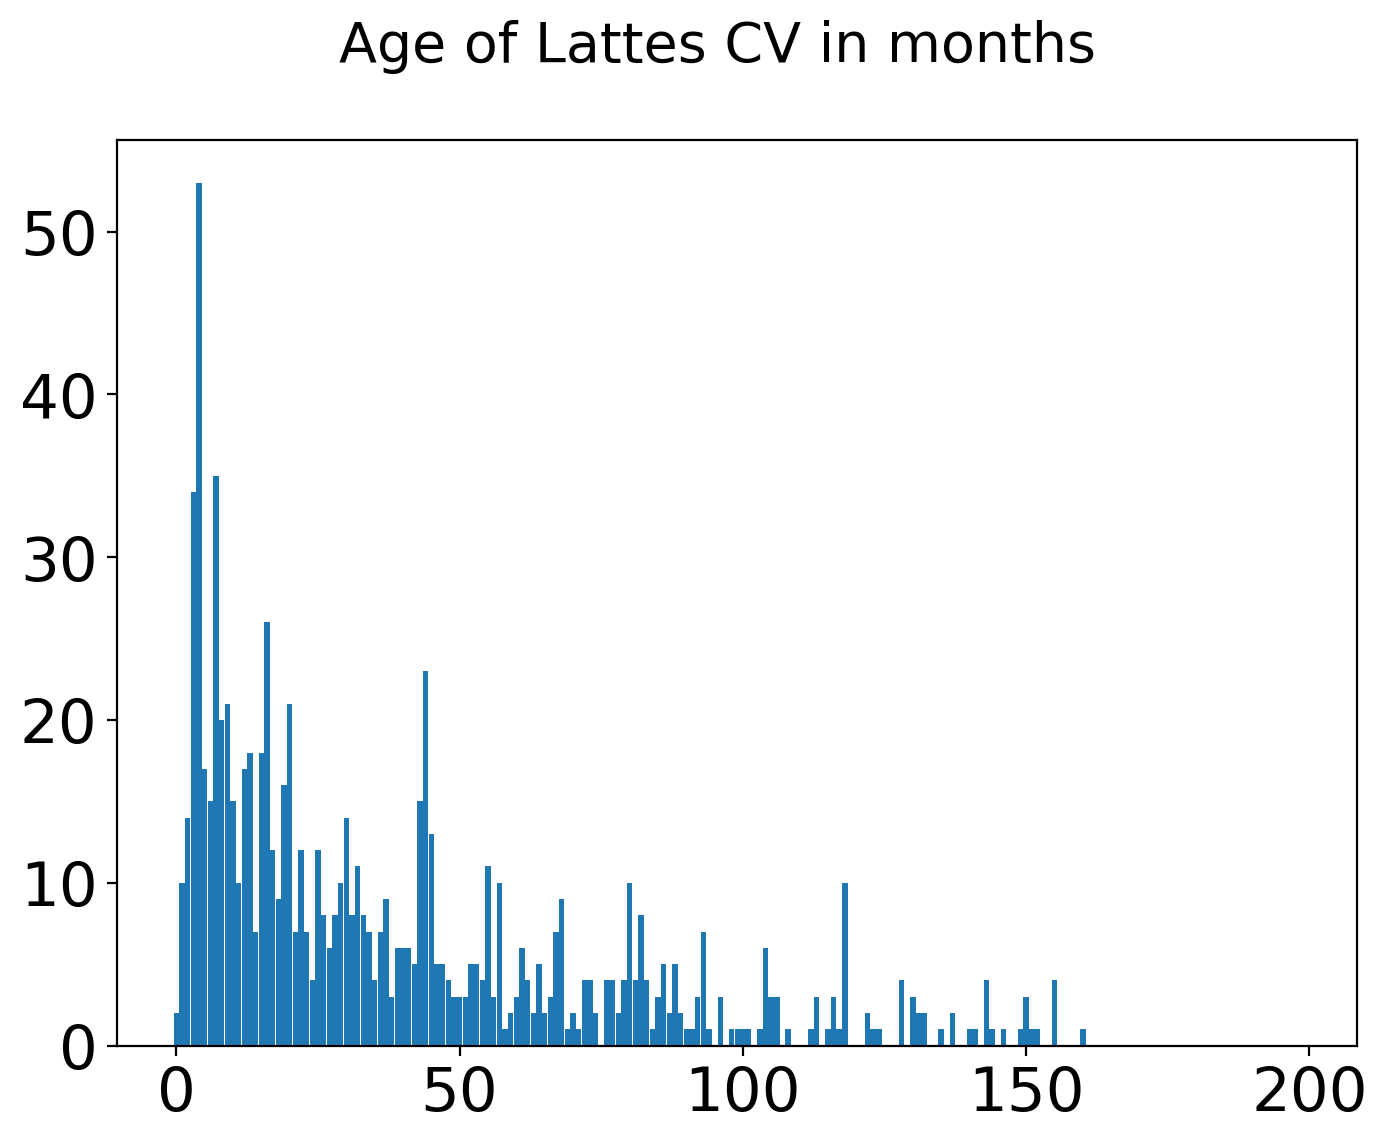

In [3]:
#Lattes CV age histogram
plt.figure(figsize=(8,6), dpi=200)
plt.hist(rawdata['atualizado'], bins=range(0,200), align='left',
             histtype='bar', rwidth=0.95)
             
plt.suptitle('Age of Lattes CV in months', fontsize=20)
plt.show()

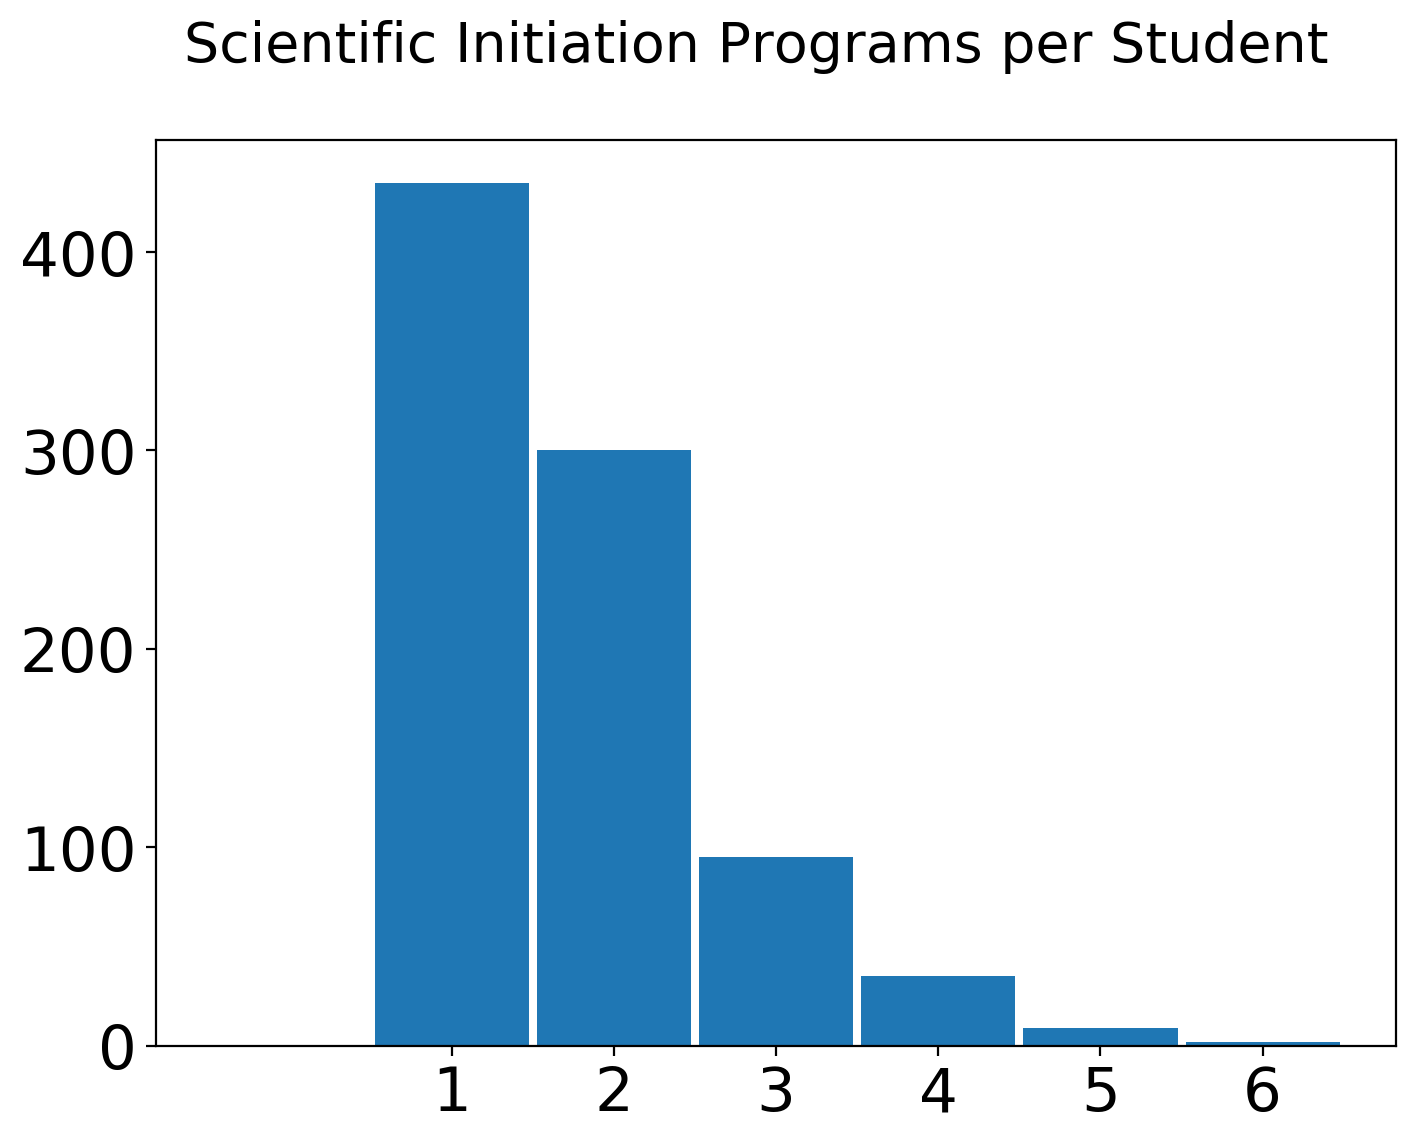

In [4]:
#histograma de quantas vezes o aluno fez bolsa PIBIC
plt.figure(figsize=(8,6), dpi=200)
plt.hist(rawdata['quantasVezesPIBIC'], bins=range(8), align='left',
             histtype='bar', rwidth=0.95)
plt.xticks(range(1,7), fontsize=22)



plt.suptitle('Scientific Initiation Programs per Student', fontsize=20)
plt.show()

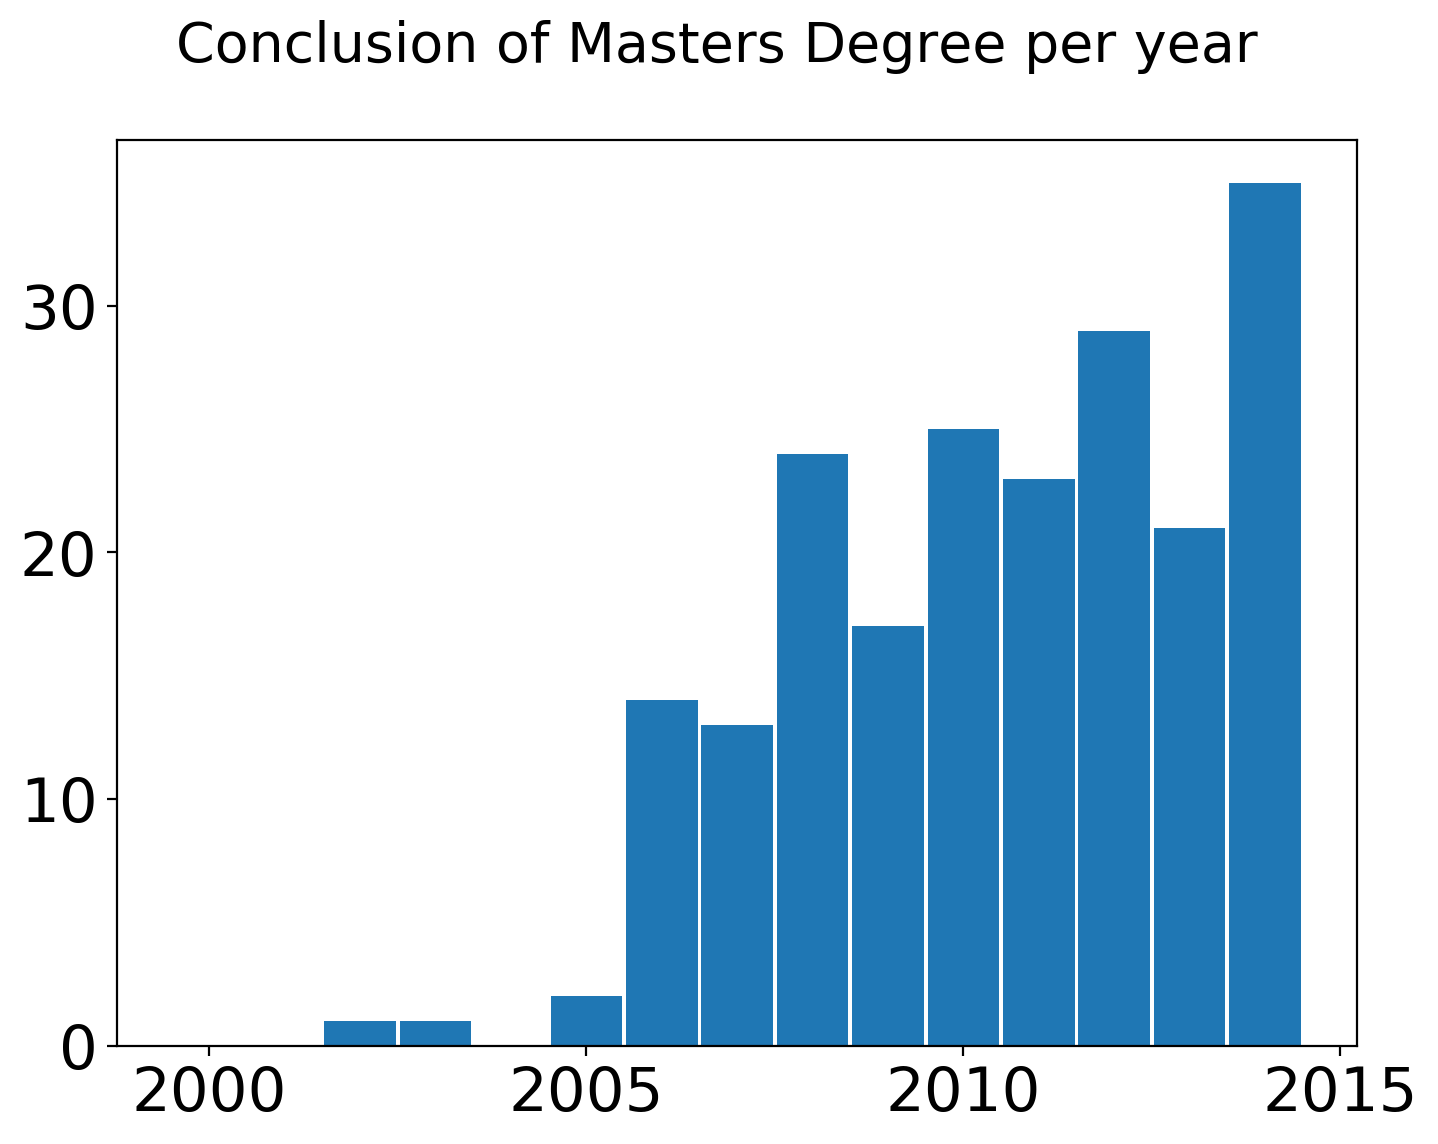

In [5]:
#Histograma dos mestrandos
plt.figure(figsize=(8,6), dpi=200)
plt.hist(rawdata['anoPrimeiroM'], bins=range(2000,2016), align='left',
             histtype='bar', rwidth=0.95)
             
plt.suptitle('Conclusion of Masters Degree per year', fontsize=20)
plt.show()

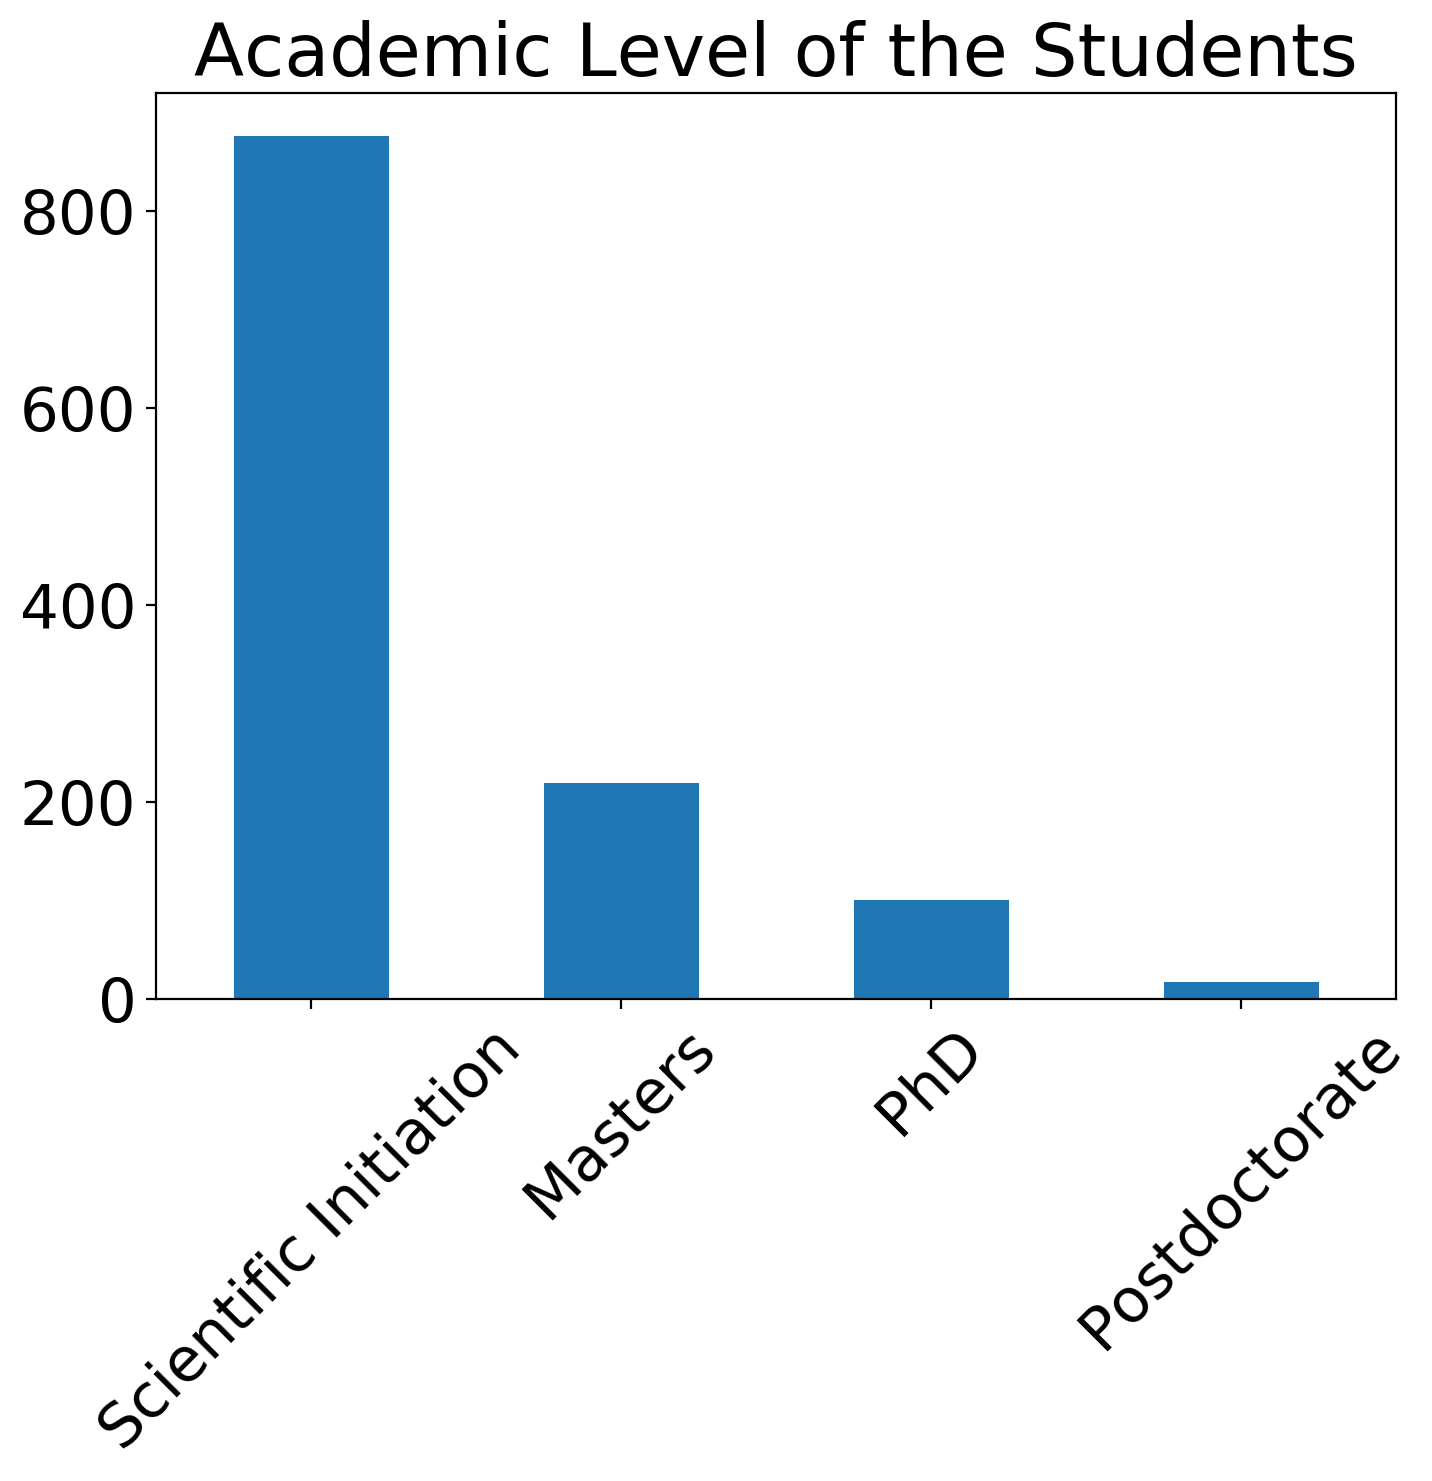

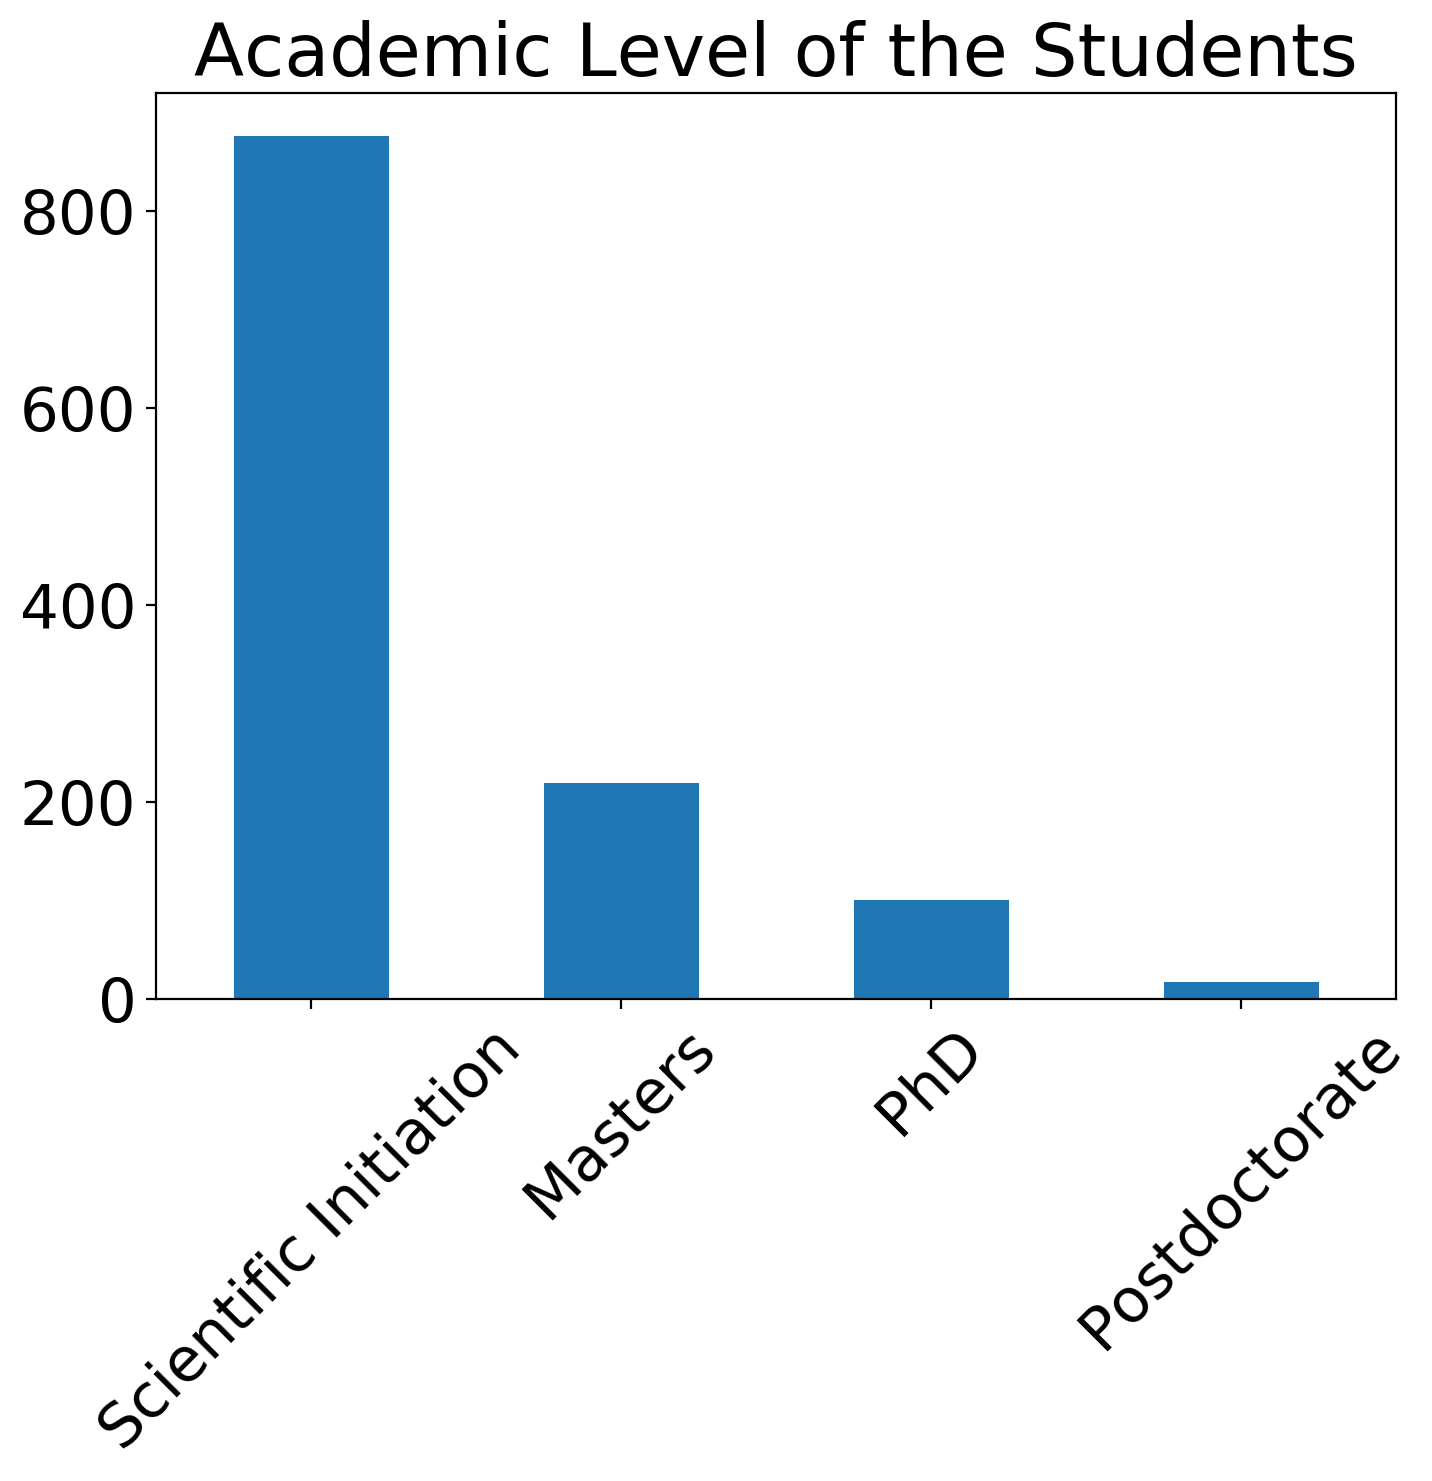

In [7]:
#codigo que funciona para o lattes small
#cleandata = cleandata.drop(cleandata.columns[cleandata.shape[1]-1], axis=1)
#cleandata = cleandata.drop(cleandata.columns[0:5], axis=1)
#rawlist = cleandata.values.tolist()

pibics = len(rawdata.loc[rawdata.quantasVezesPIBIC >= 1])
masters = len(rawdata.loc[rawdata.quantosM >= 1])
phds = len(rawdata.loc[rawdata.quantosD >= 1])
pphds = len(rawdata.loc[rawdata.quantosPD >= 1])

graddata = pd.DataFrame([pibics, masters, phds, pphds],
                        index=['Scientific Initiation','Masters','PhD',
                               'Postdoctorate'],
                        columns=['Quantity'])


fig = graddata.plot(y='Quantity', kind='bar', legend=False)
fig.set_xticklabels(graddata.index, rotation=45)
plt.title('Academic Level of the Students')

plt.show()

#normalizar o ano da primeira publicacao
#o primeiro ano de publicacao e 2004
#ArtComp2004 = coluna 11
#TrabCong2004 = coluna 24

In [8]:
#Concatena a quantidade de artigos e de trabalhos em congressos apresentados
#como indice de produtividade

pubyeardata = pd.DataFrame(index=rawdata.index)
for i in range(0, 13):
    pubyeardata['pub' + str(2004 + i)] = rawdata['ArtComp' + str(2004 + i)] + \
        rawdata['TrabCong' + str(2004 + i)]
                                         
pubdata = pubyeardata.copy()
strindex = ['year']*pubdata.shape[1]
for i in range(1,pubdata.shape[1]):
    strindex[i] = strindex[i] + str(i+1)
pubdata.columns = strindex


def firstnonzero(frame, nrow):
#shifta o primeiro indice para o primeiro ano em que houve producao
    n = frame.shape[1]
    count = 0
    while ((frame.iloc[nrow, 0] == 0) & (count < n)):
        for j in range(0, n-1):
            frame.set_value(nrow, frame.columns[j], frame.iloc[nrow,j+1])
        frame.set_value(nrow, frame.columns[n-1], 0)
        count = count + 1
        

def firstnonzero2(frame, frameindex, nrow):
    #shifta o primeiro indice para o primeiro ano do PIBIC
    n = frame.shape[1]
    count = 0
    nshift = frameindex[nrow] - 2004
    if nshift > 0:
        for j in range(0, n-1-nshift):
            frame.set_value(nrow, frame.columns[j], frame.iloc[nrow,j+nshift])
            frame.set_value(nrow, frame.columns[n-1-j], 0)
        count = count + 1
        
        
#for i in range(0, pubdata.shape[0]-1):
#    firstnonzero(pubdata, i)

for i in range(0, pubdata.shape[0]-1):  
    firstnonzero2(pubdata, rawdata['anoPrimeiroPIBIC'], i)    


Rodada com todos os dados


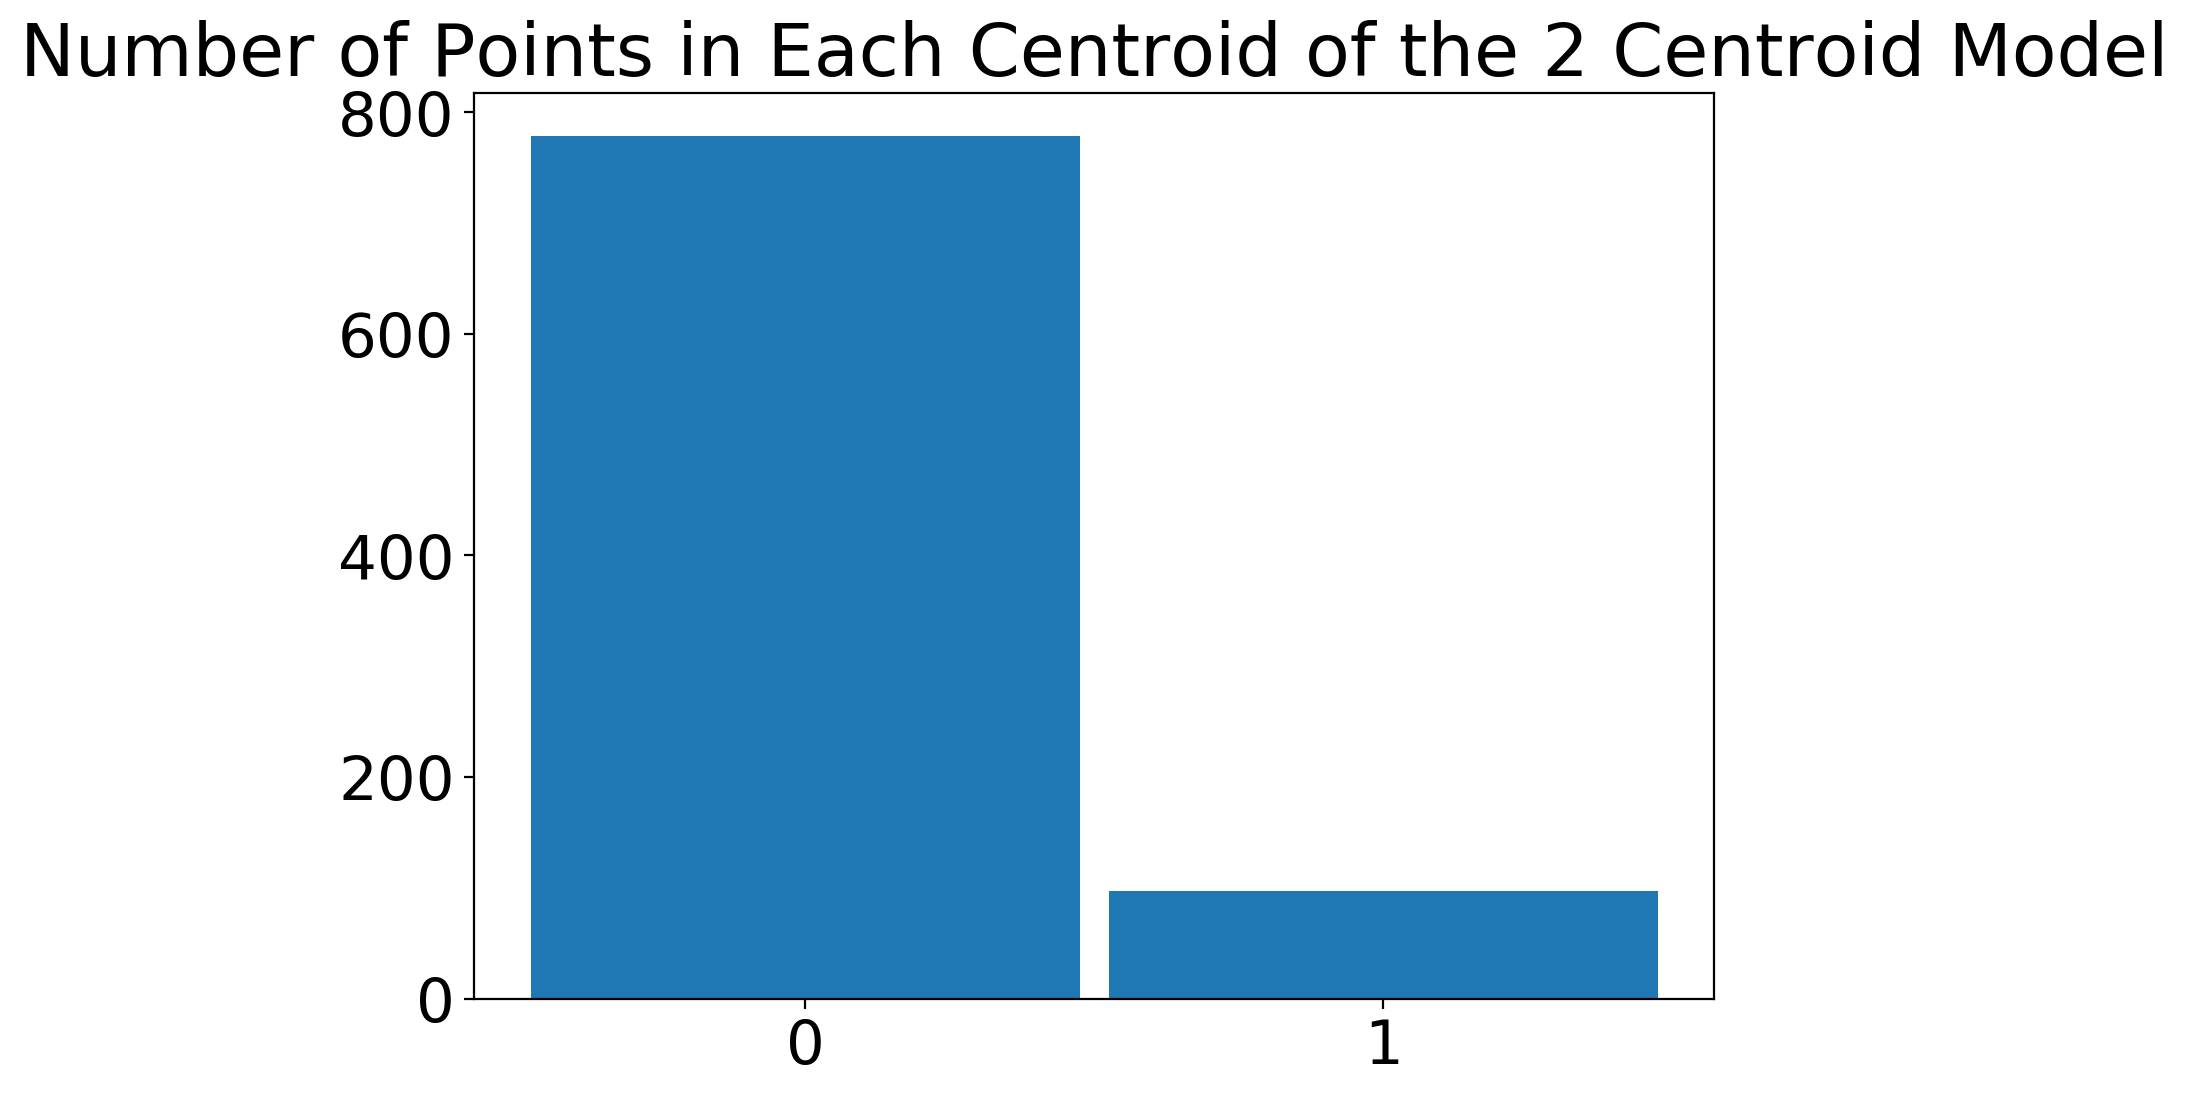

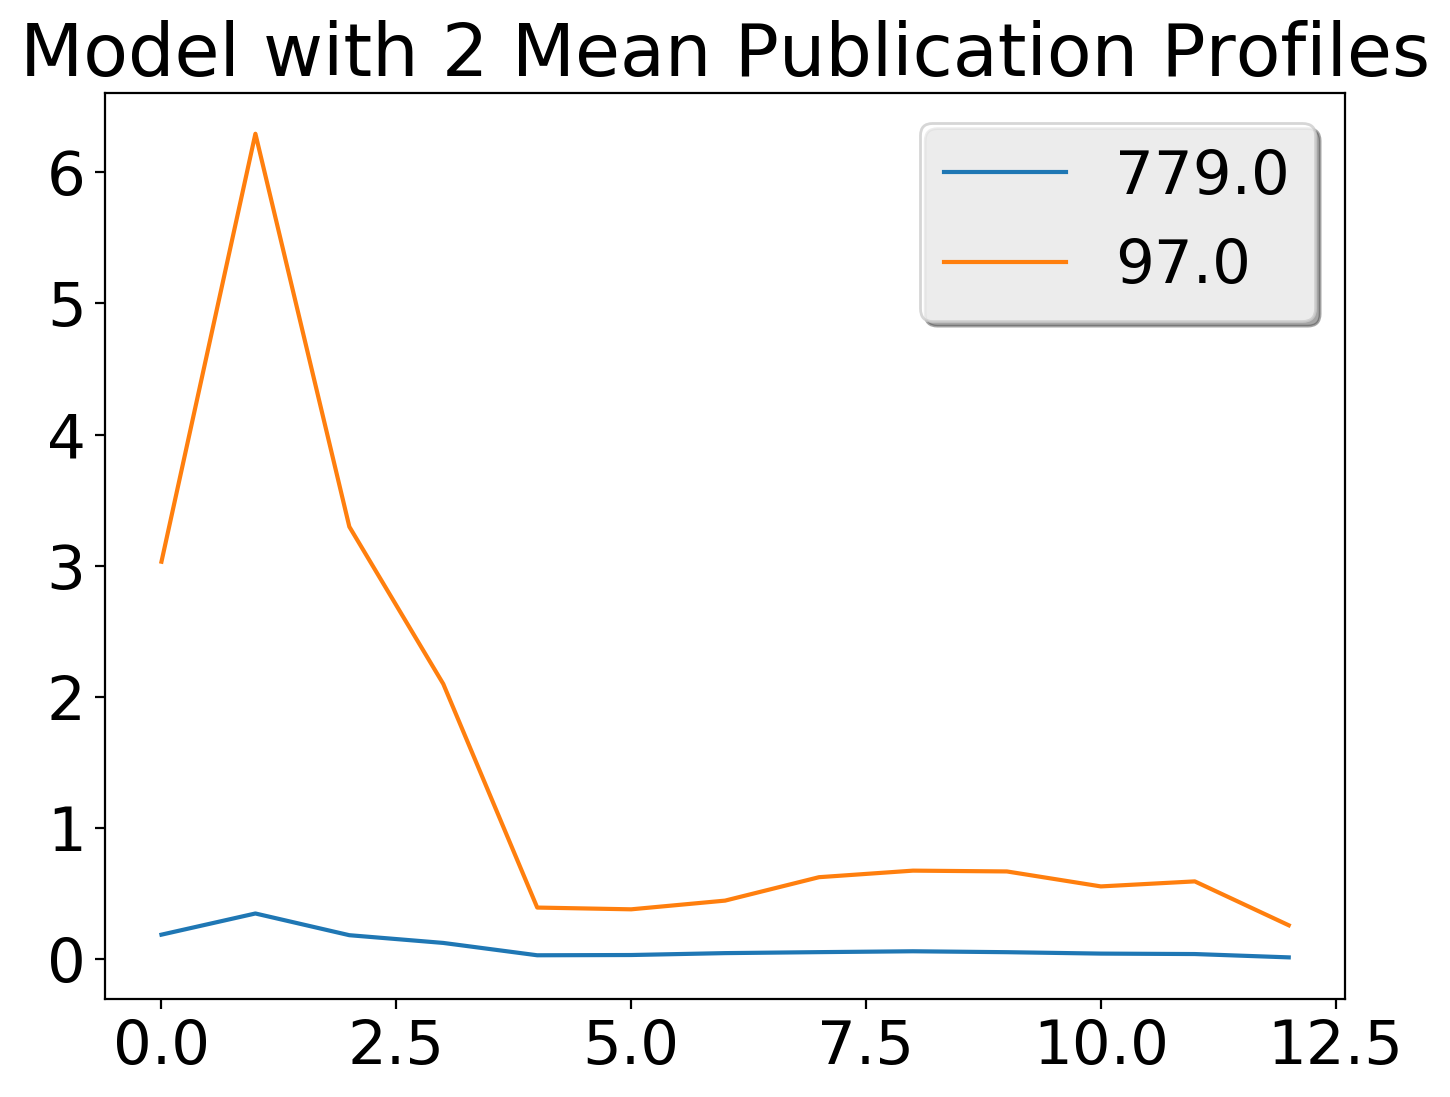

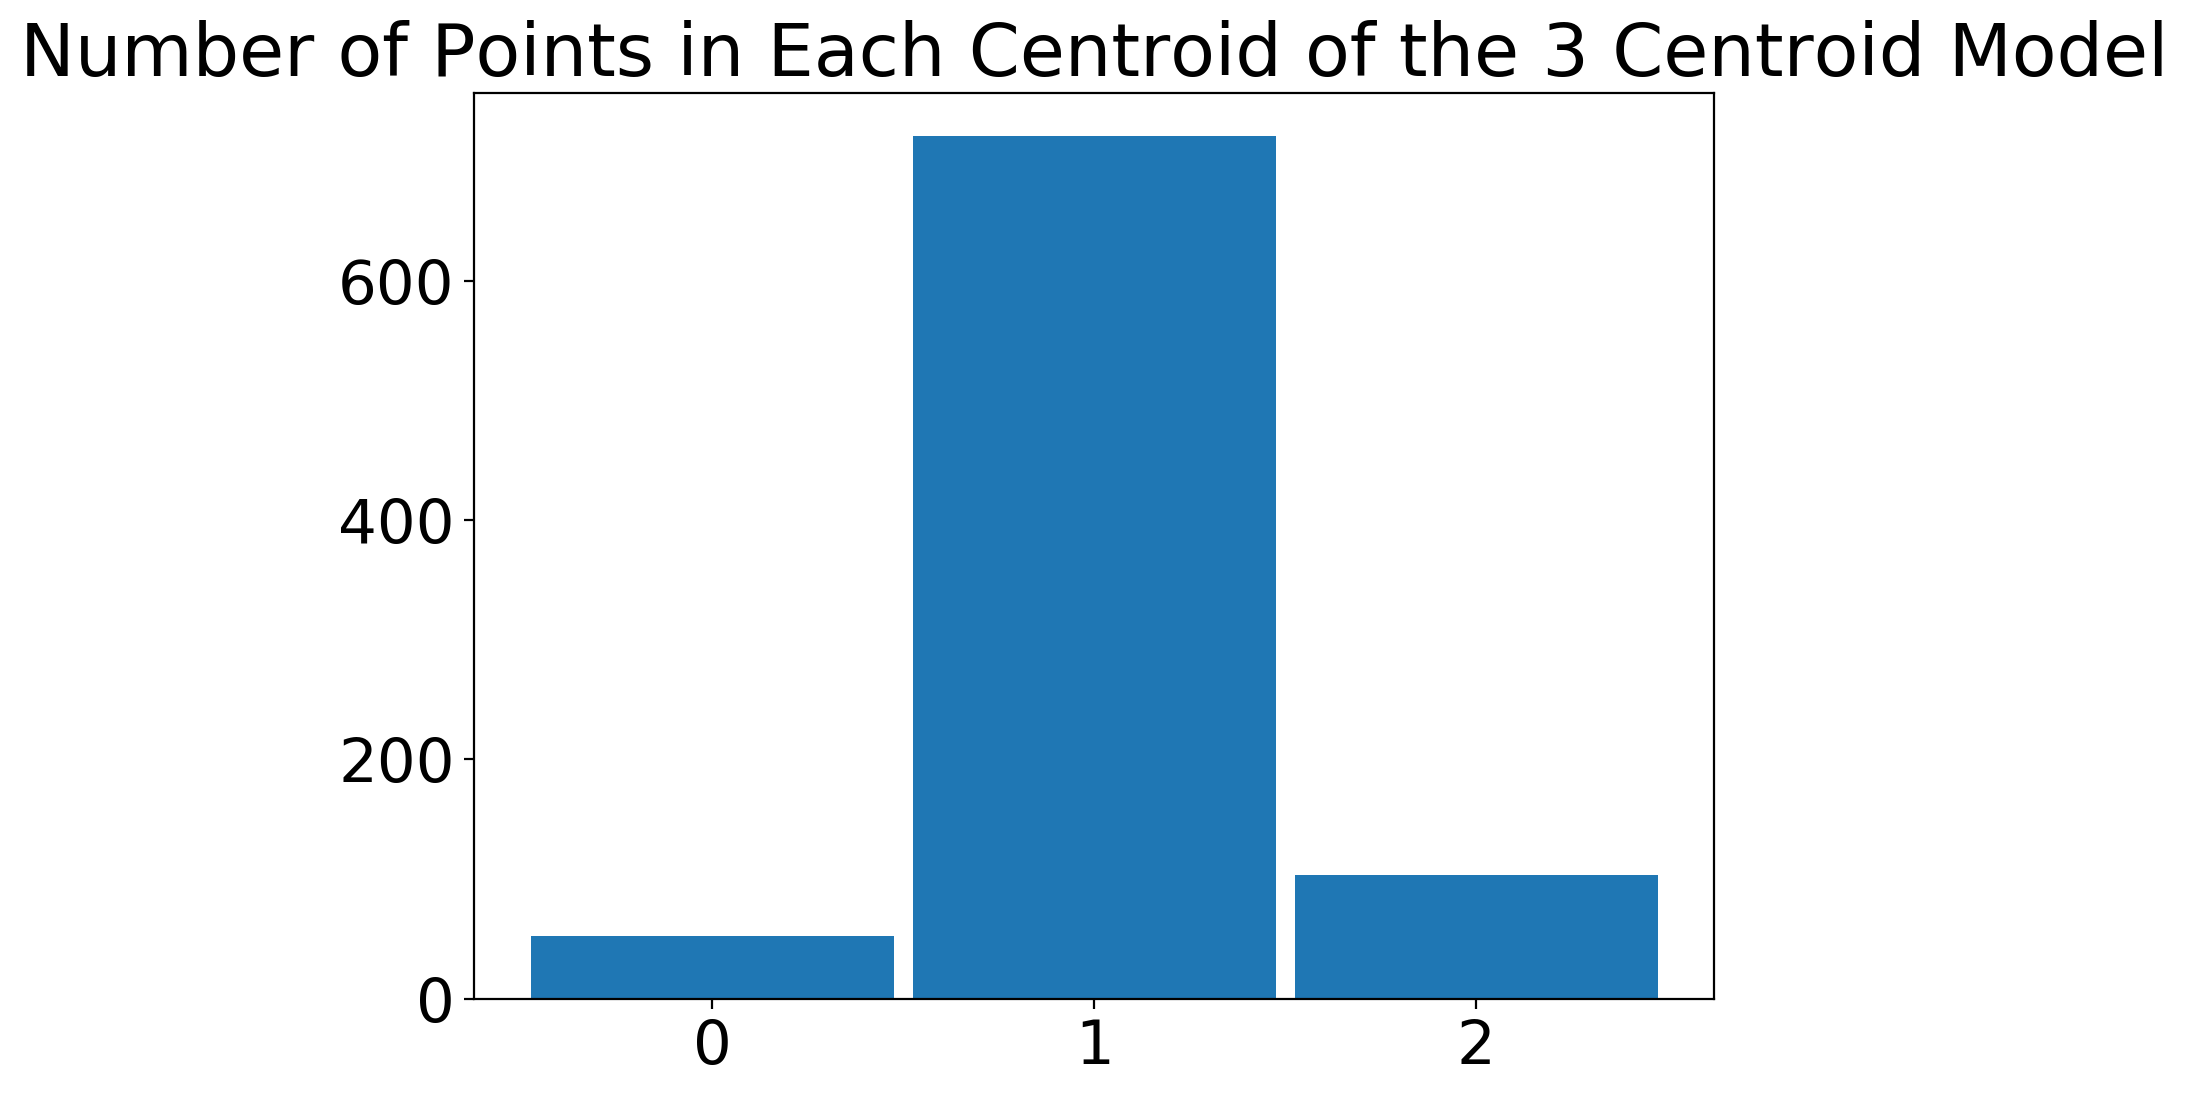

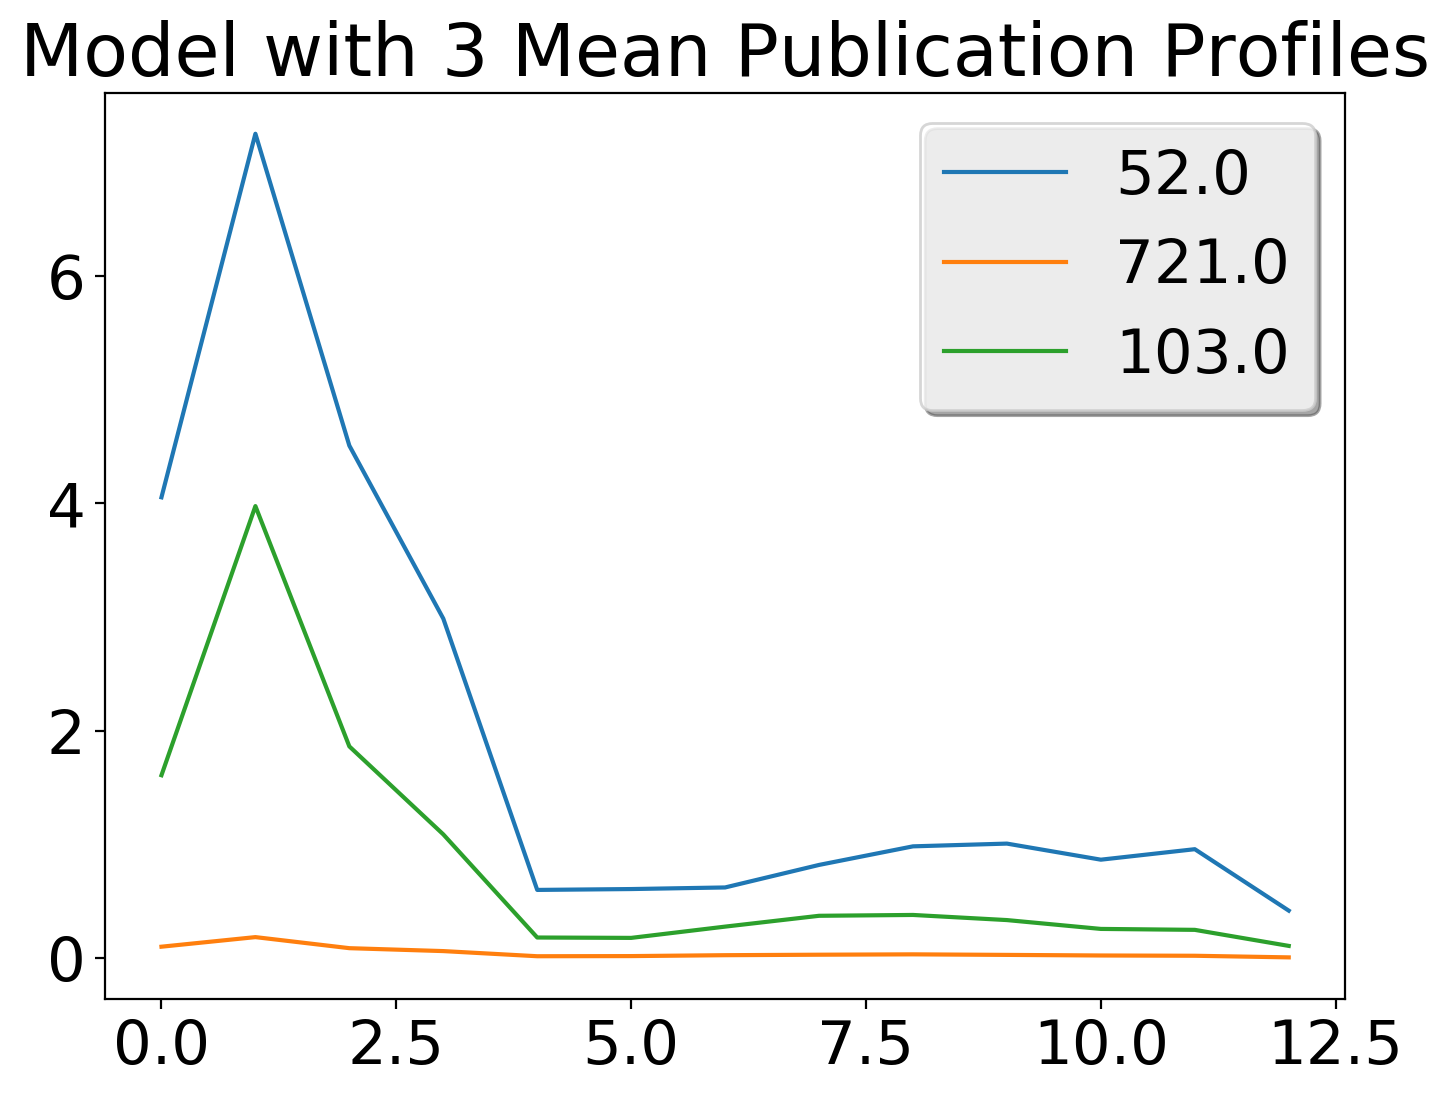

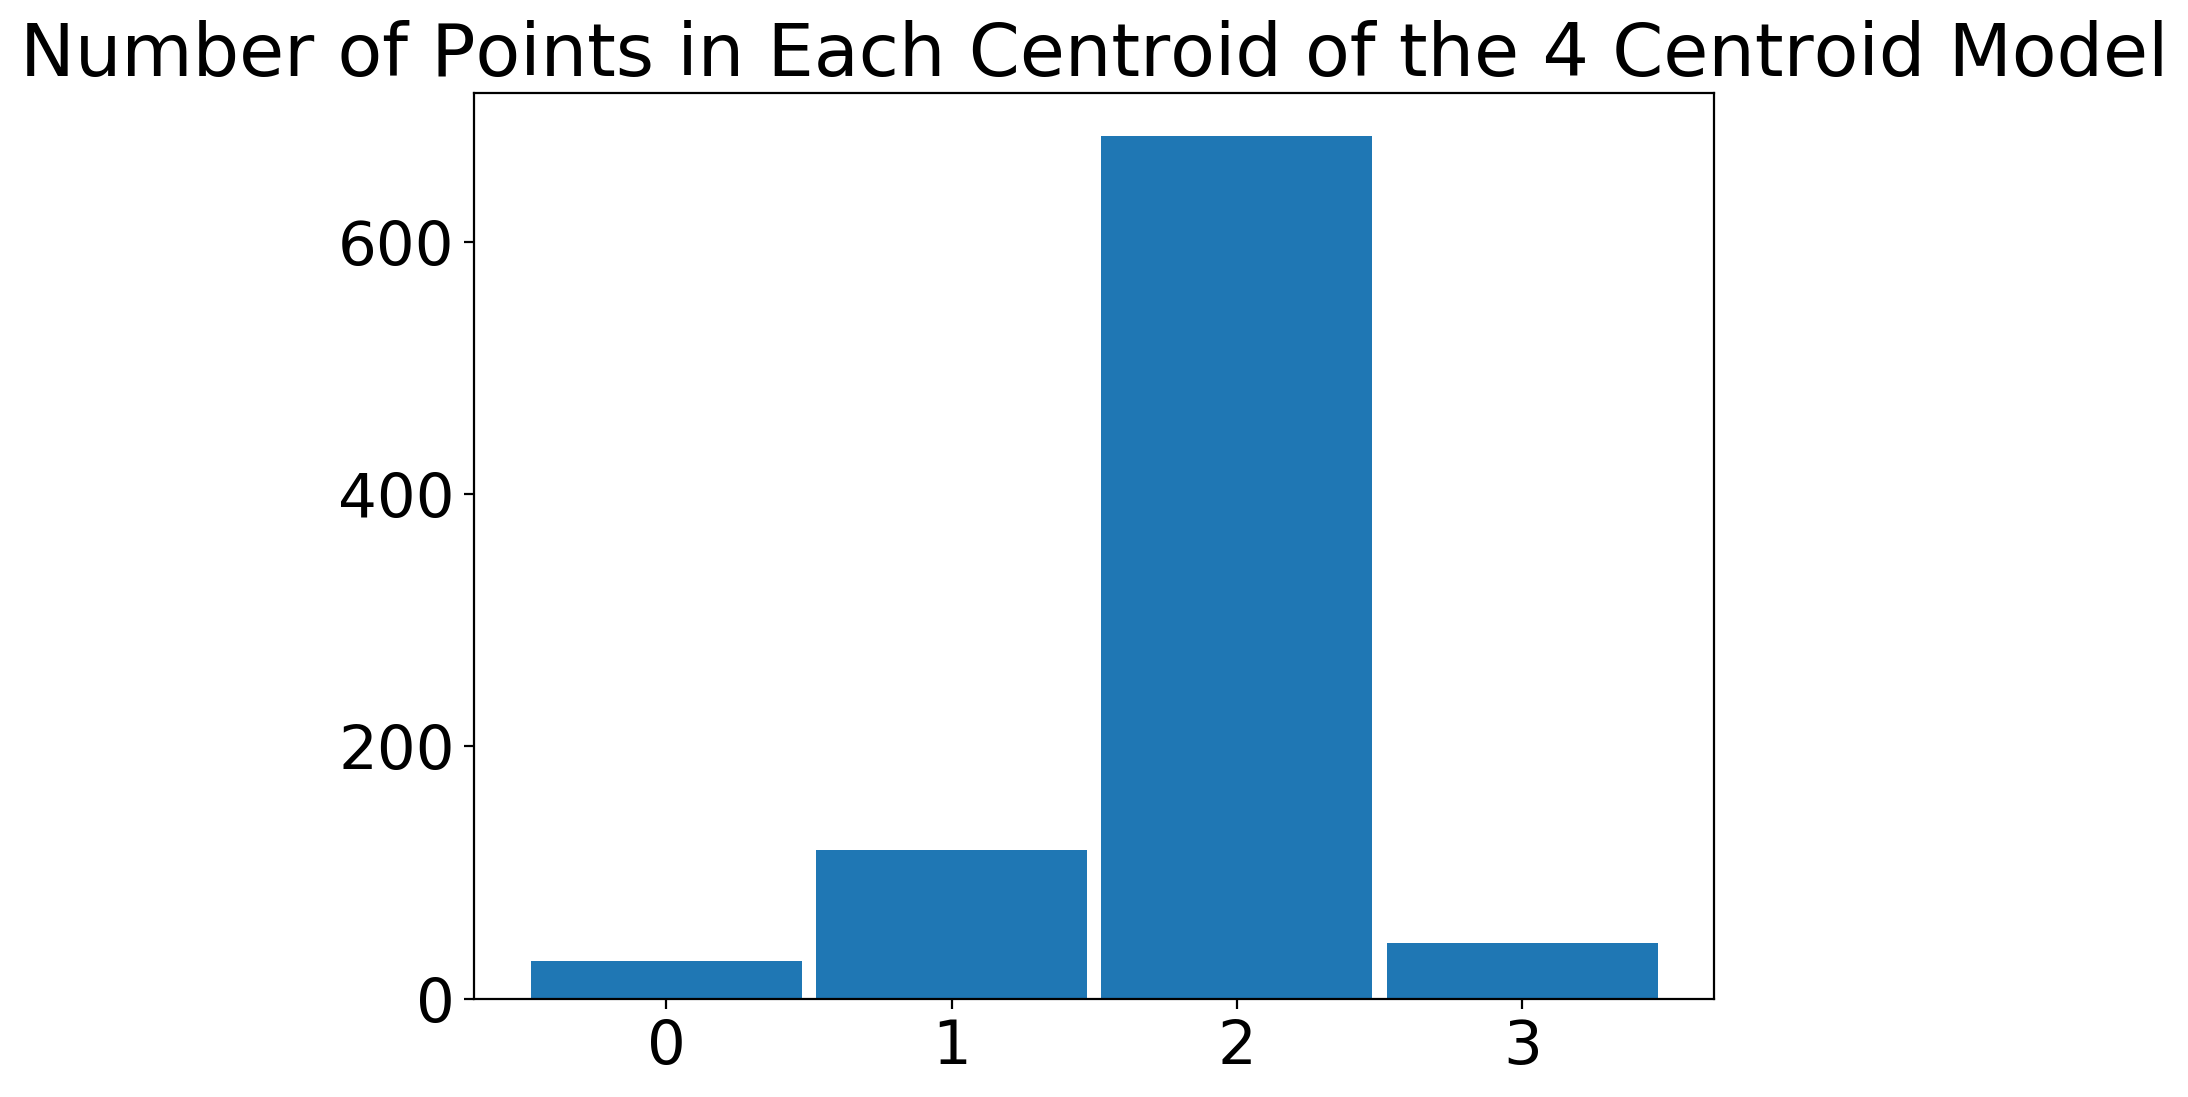

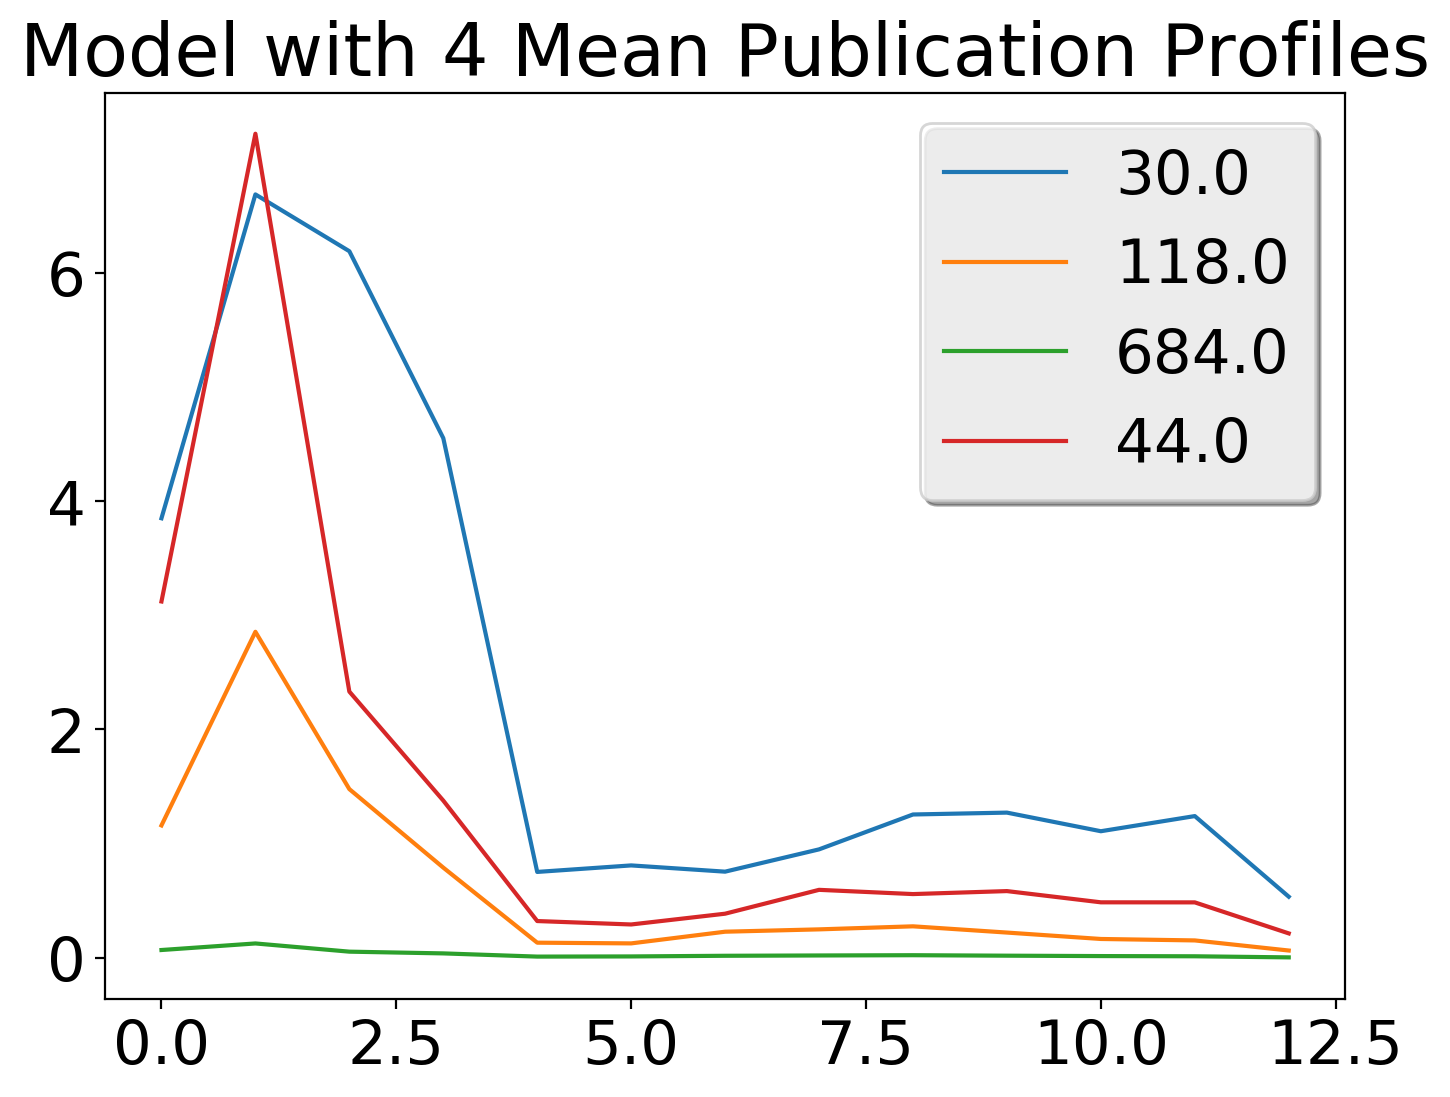

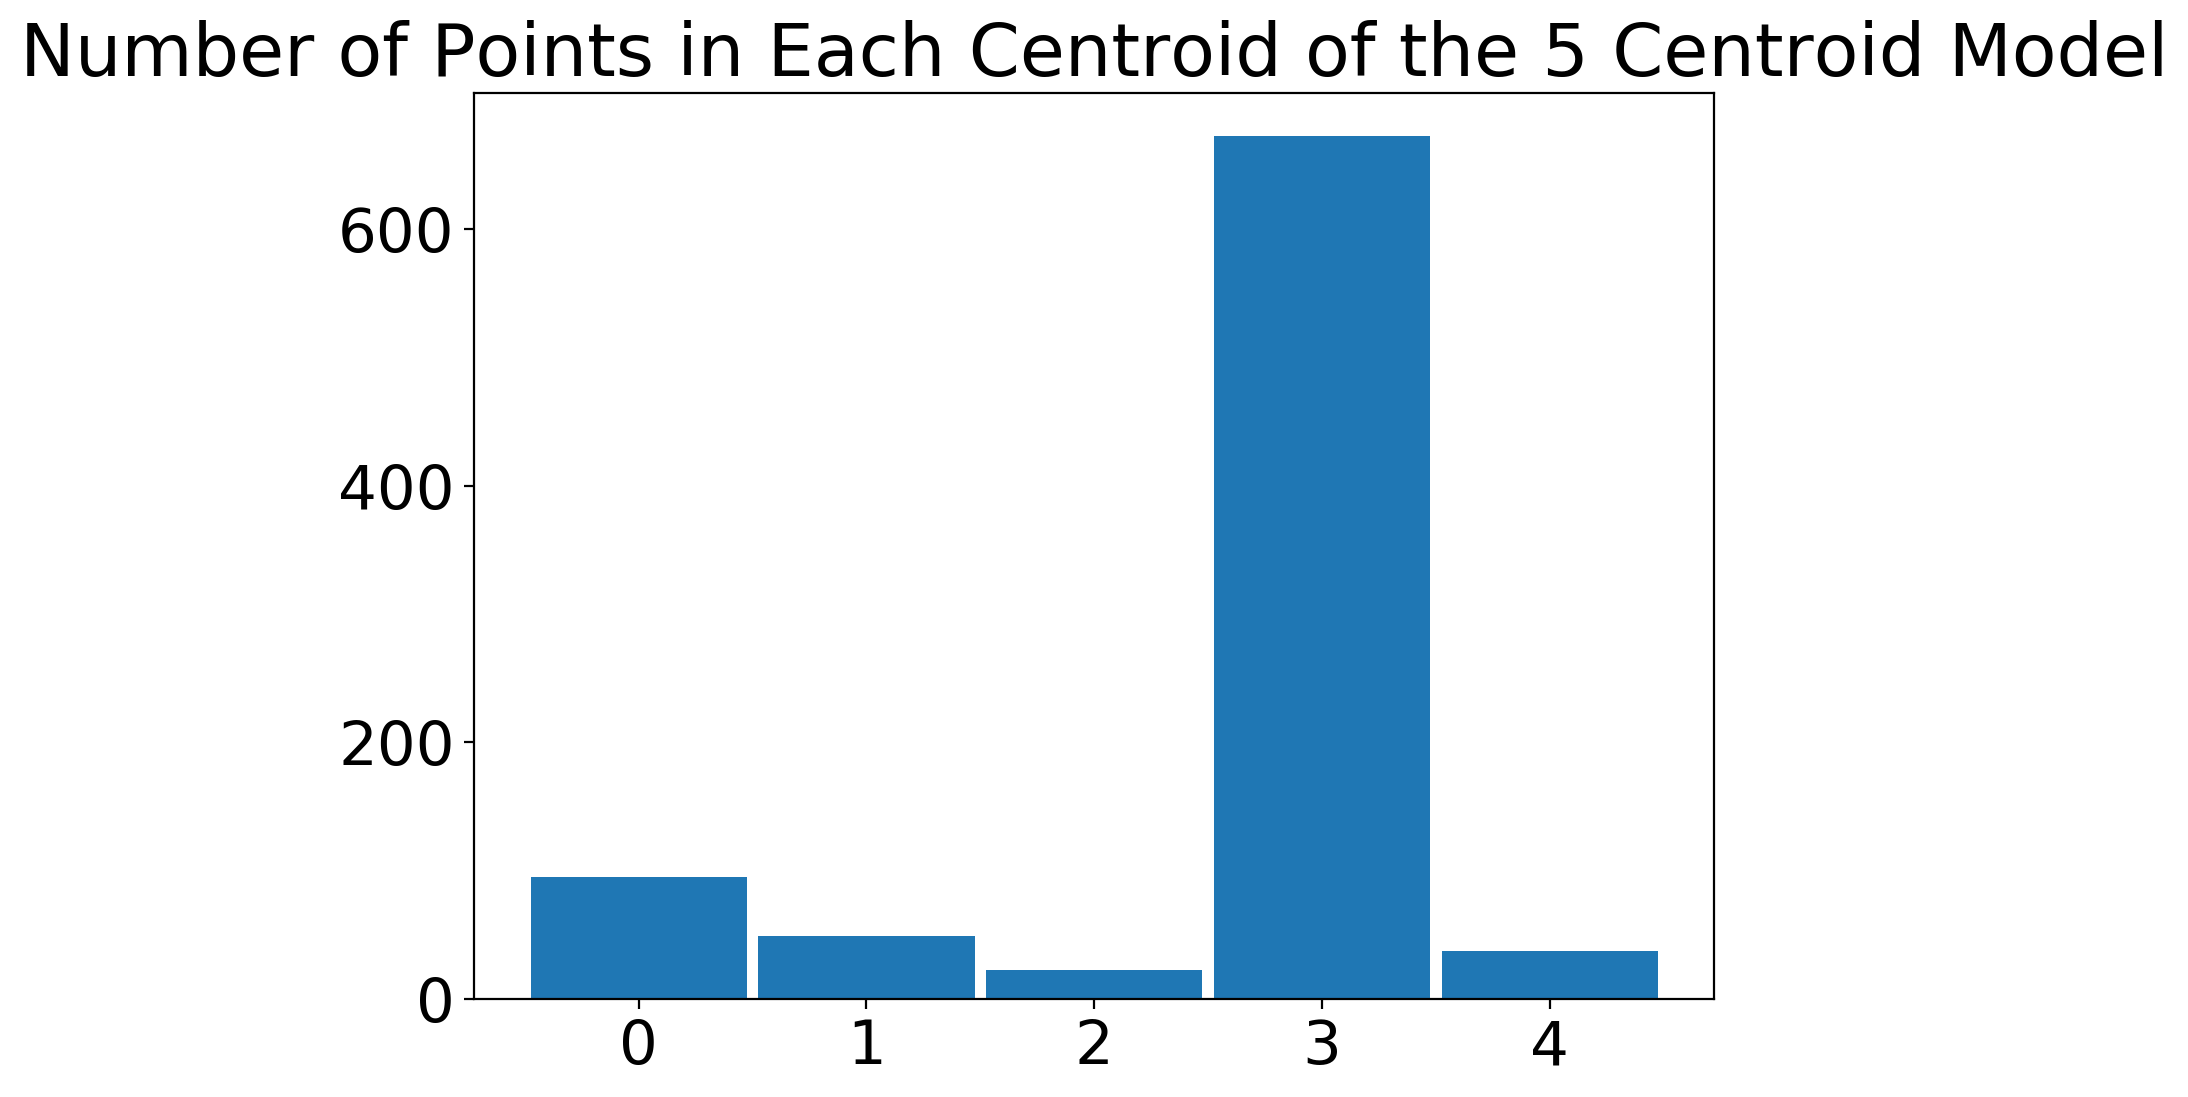

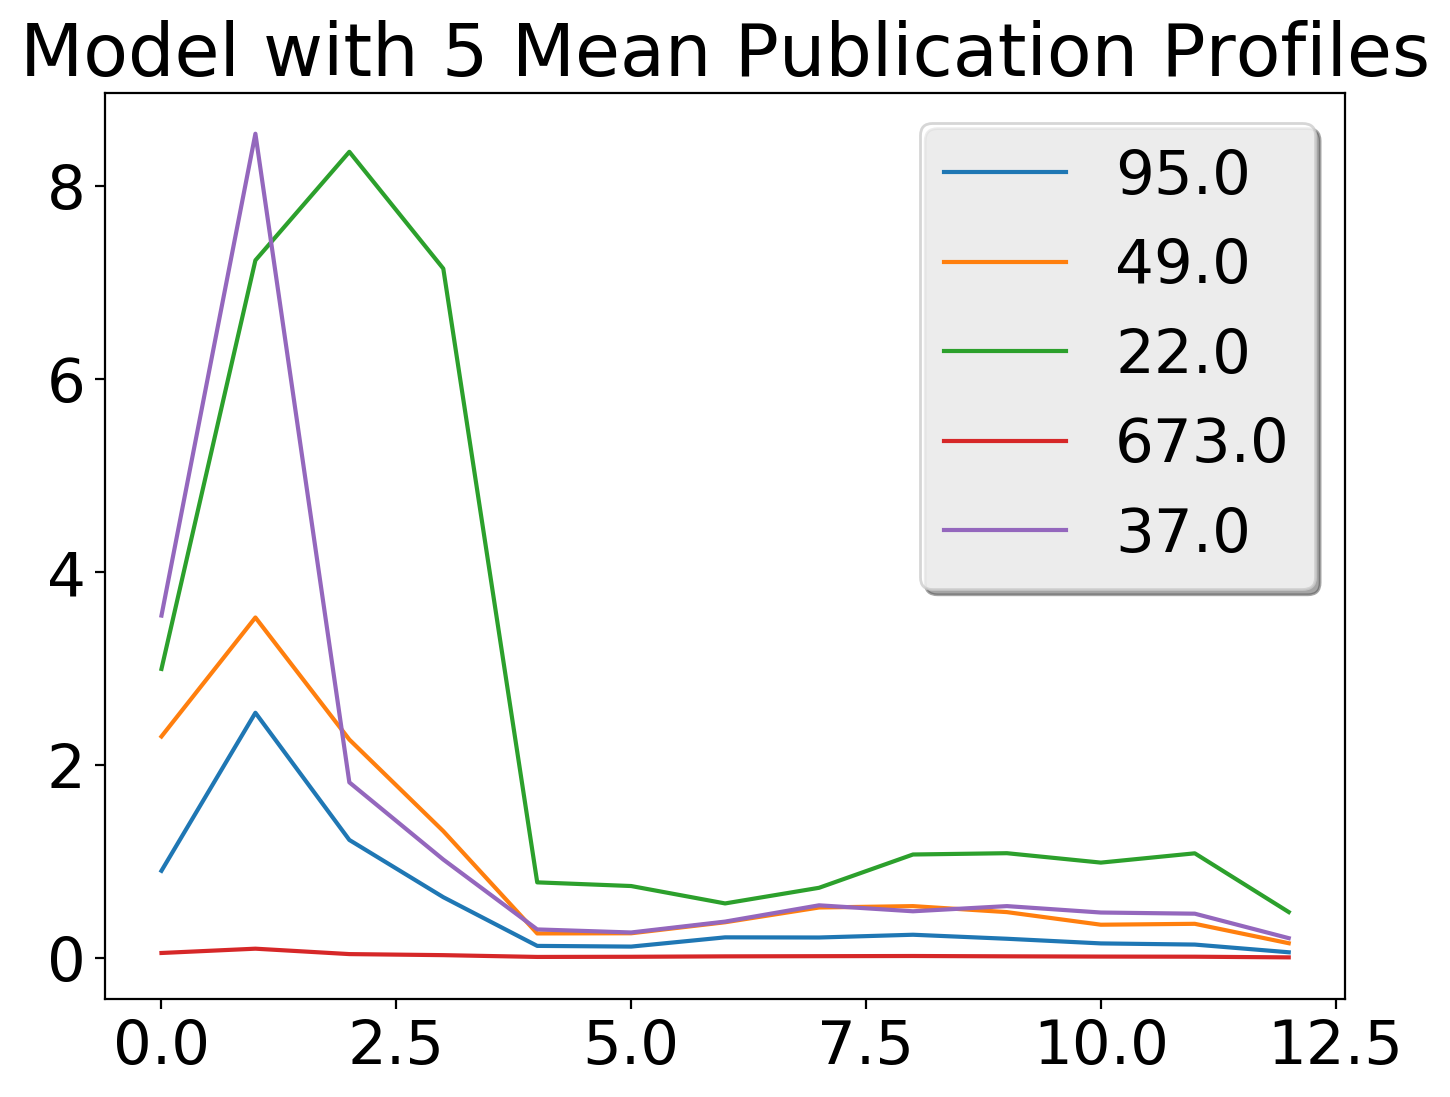

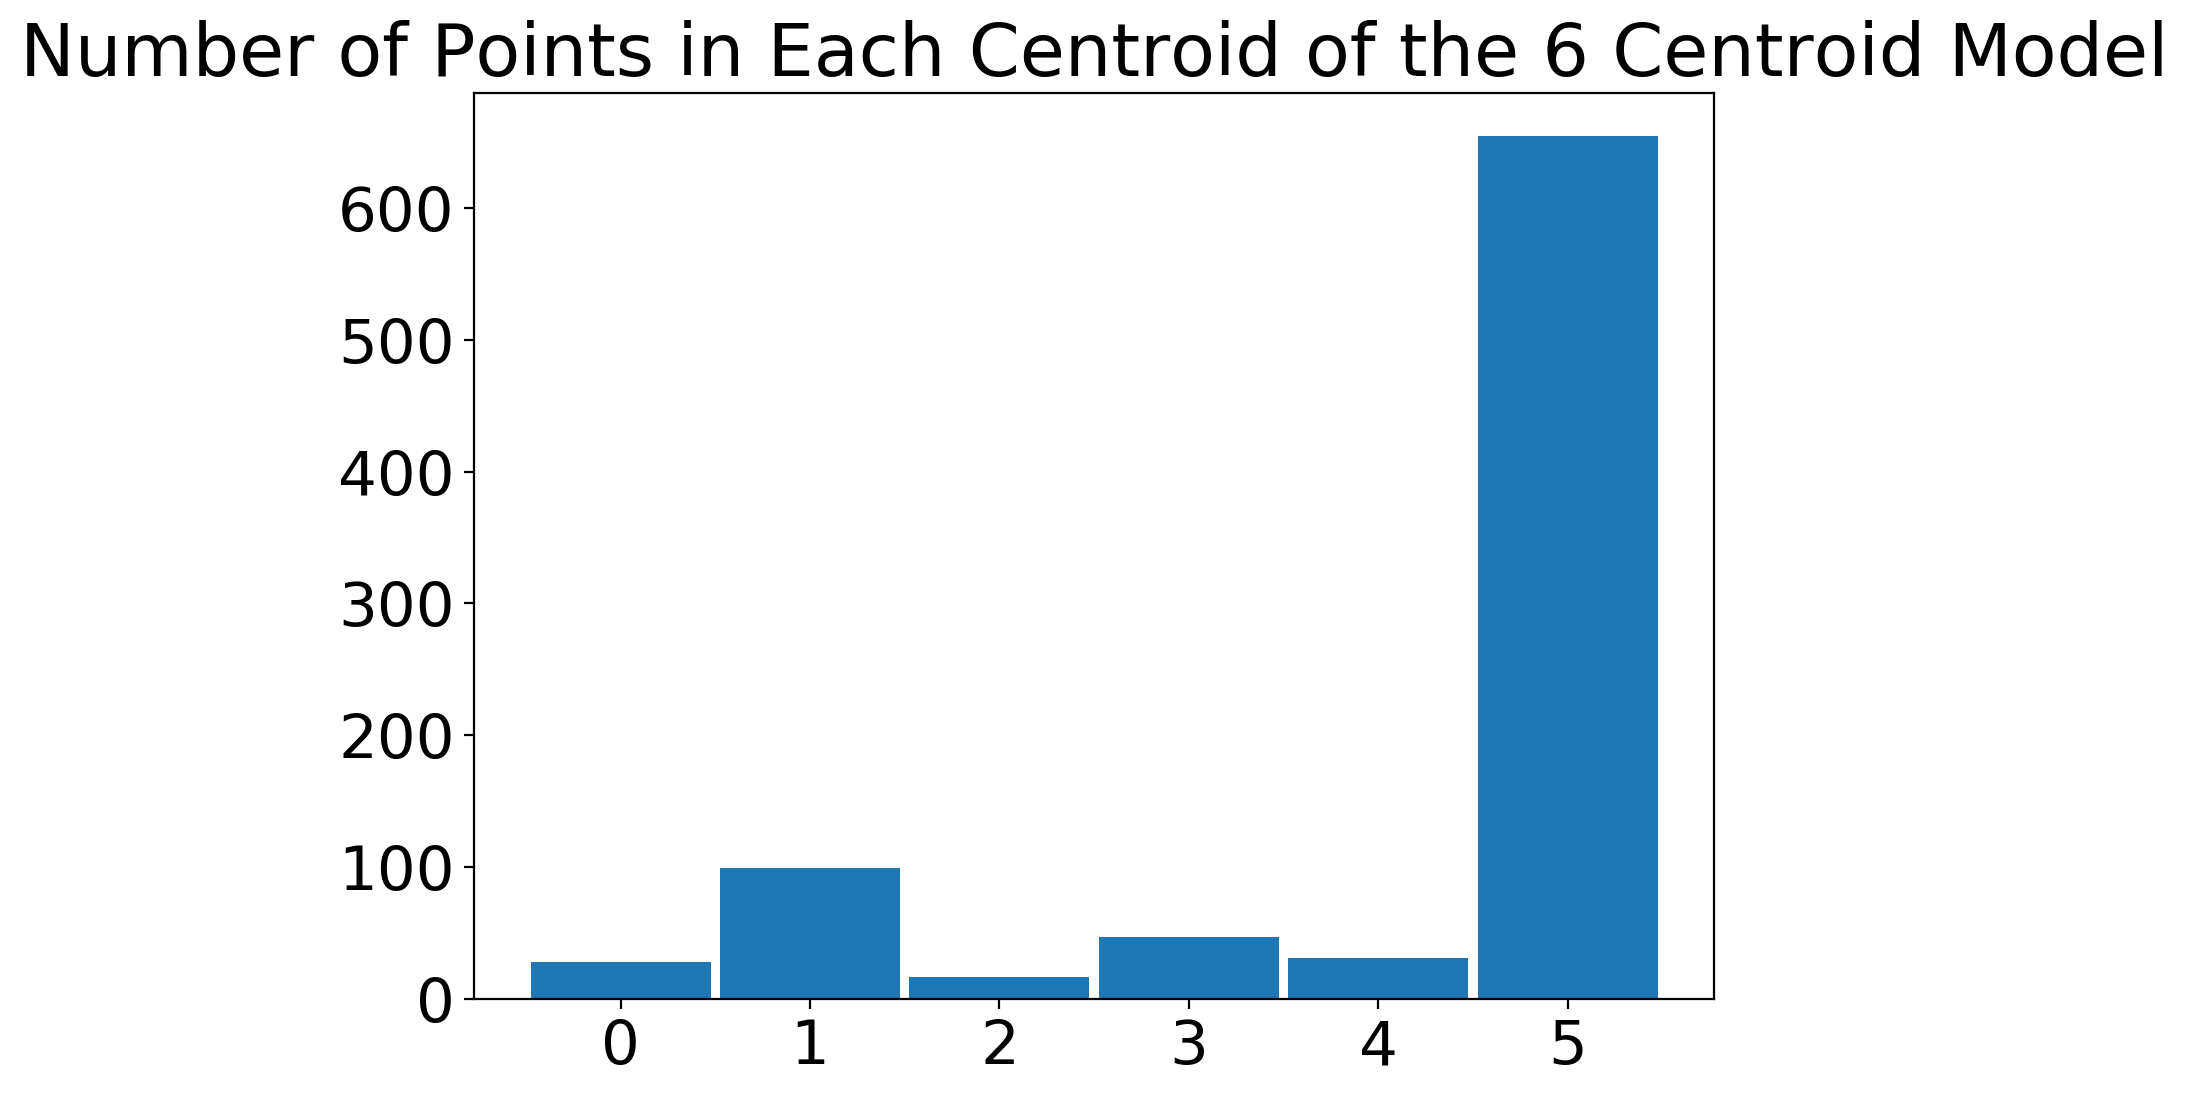

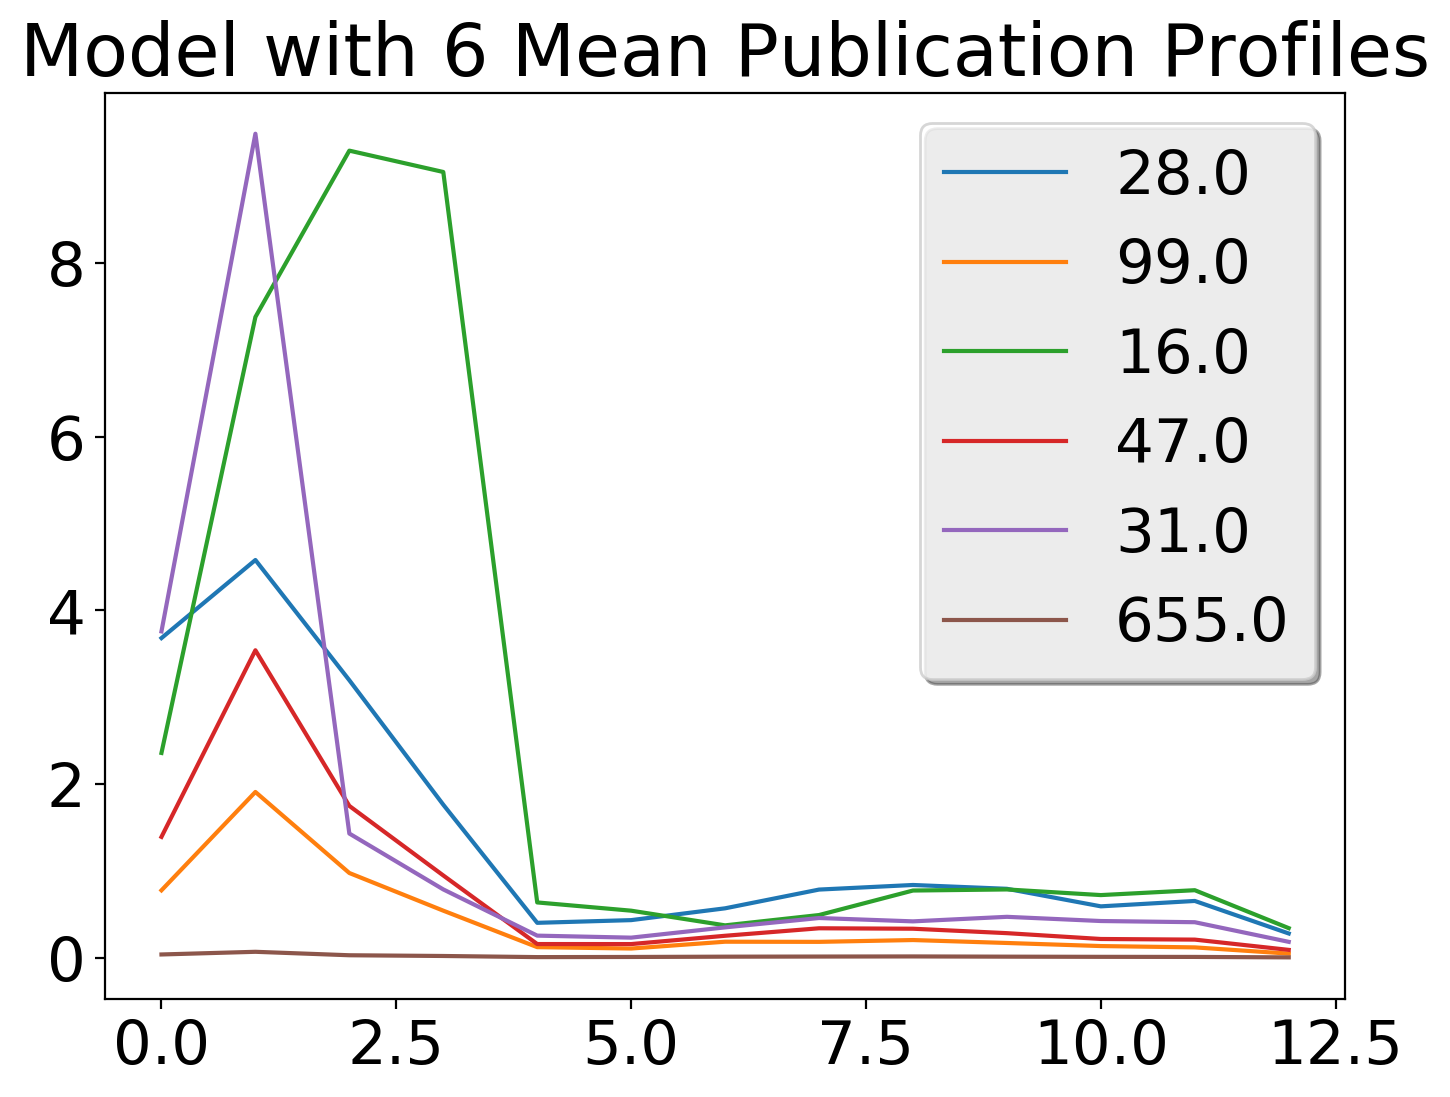

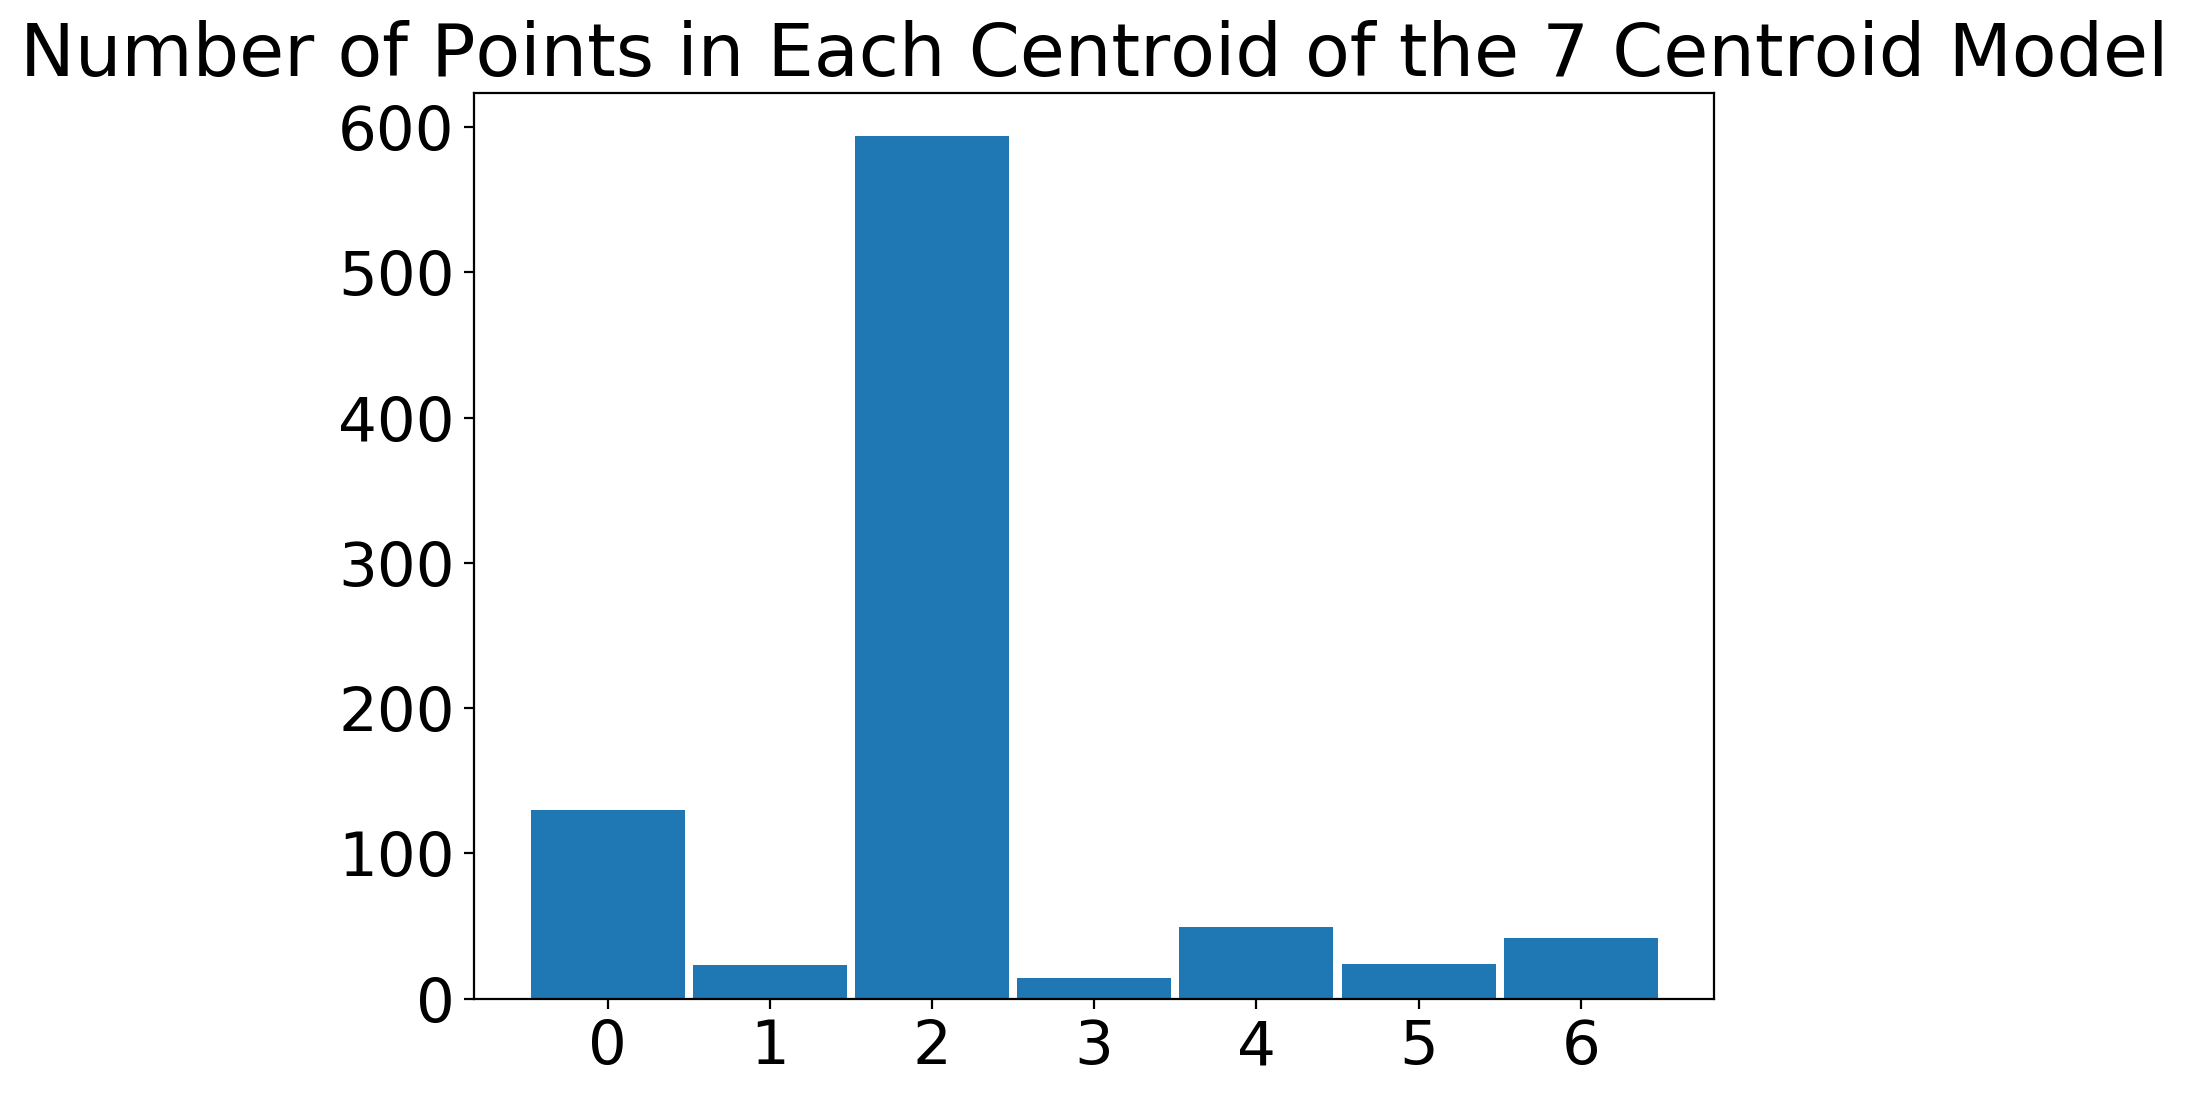

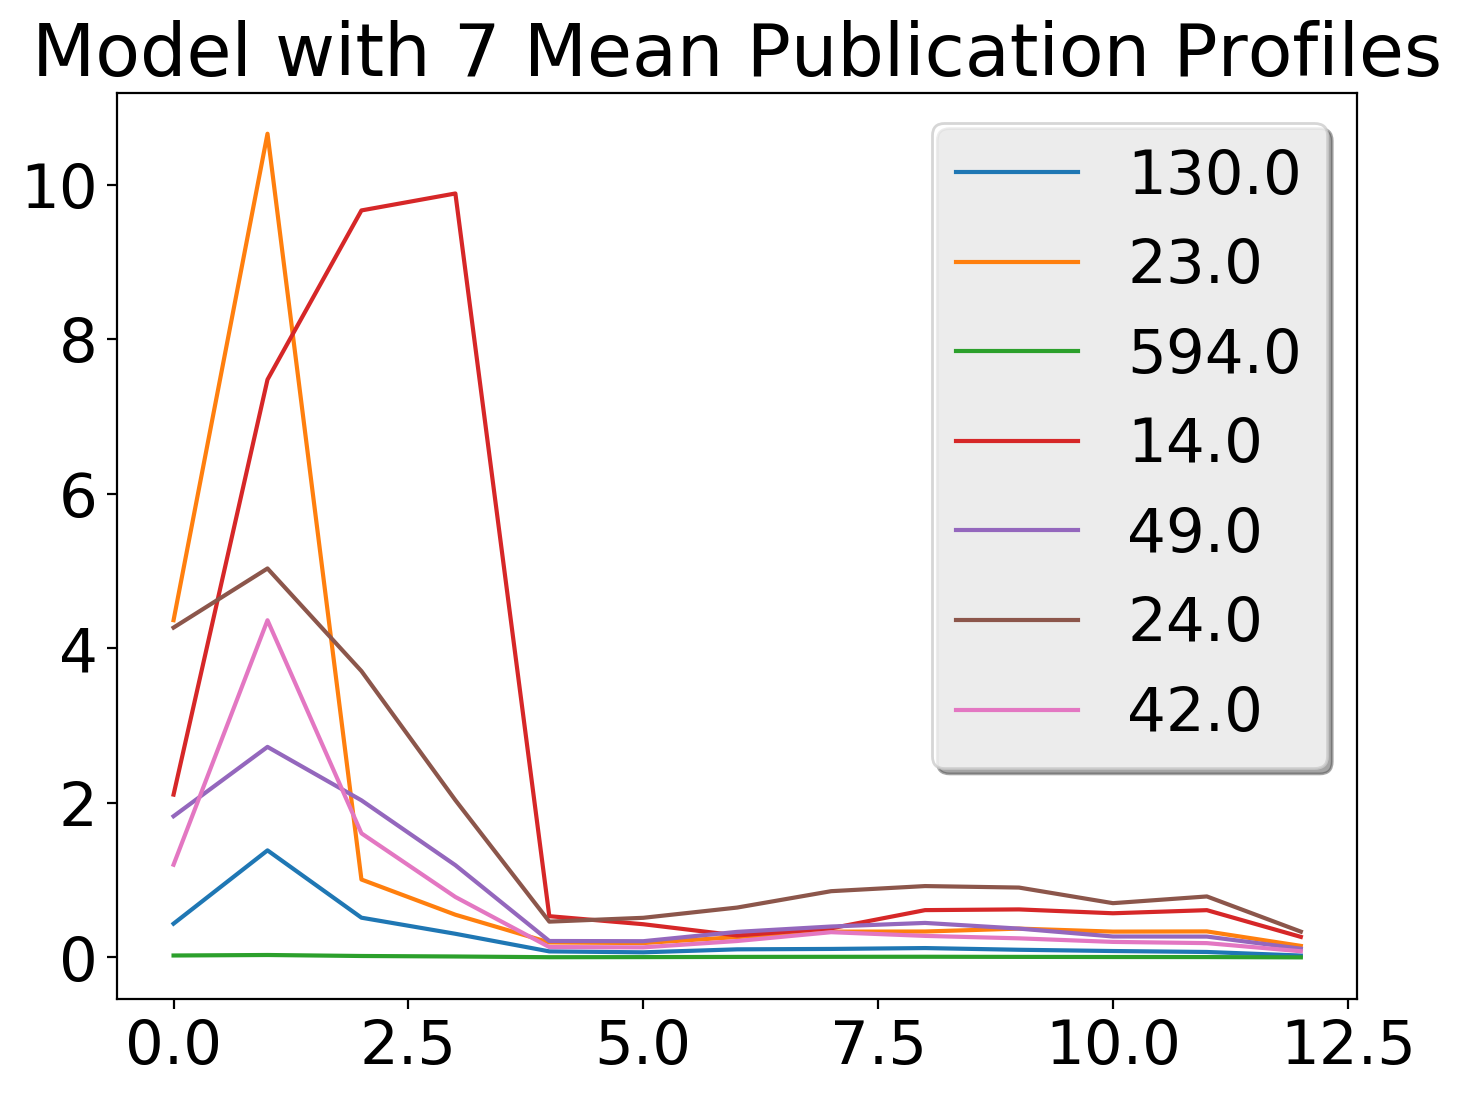

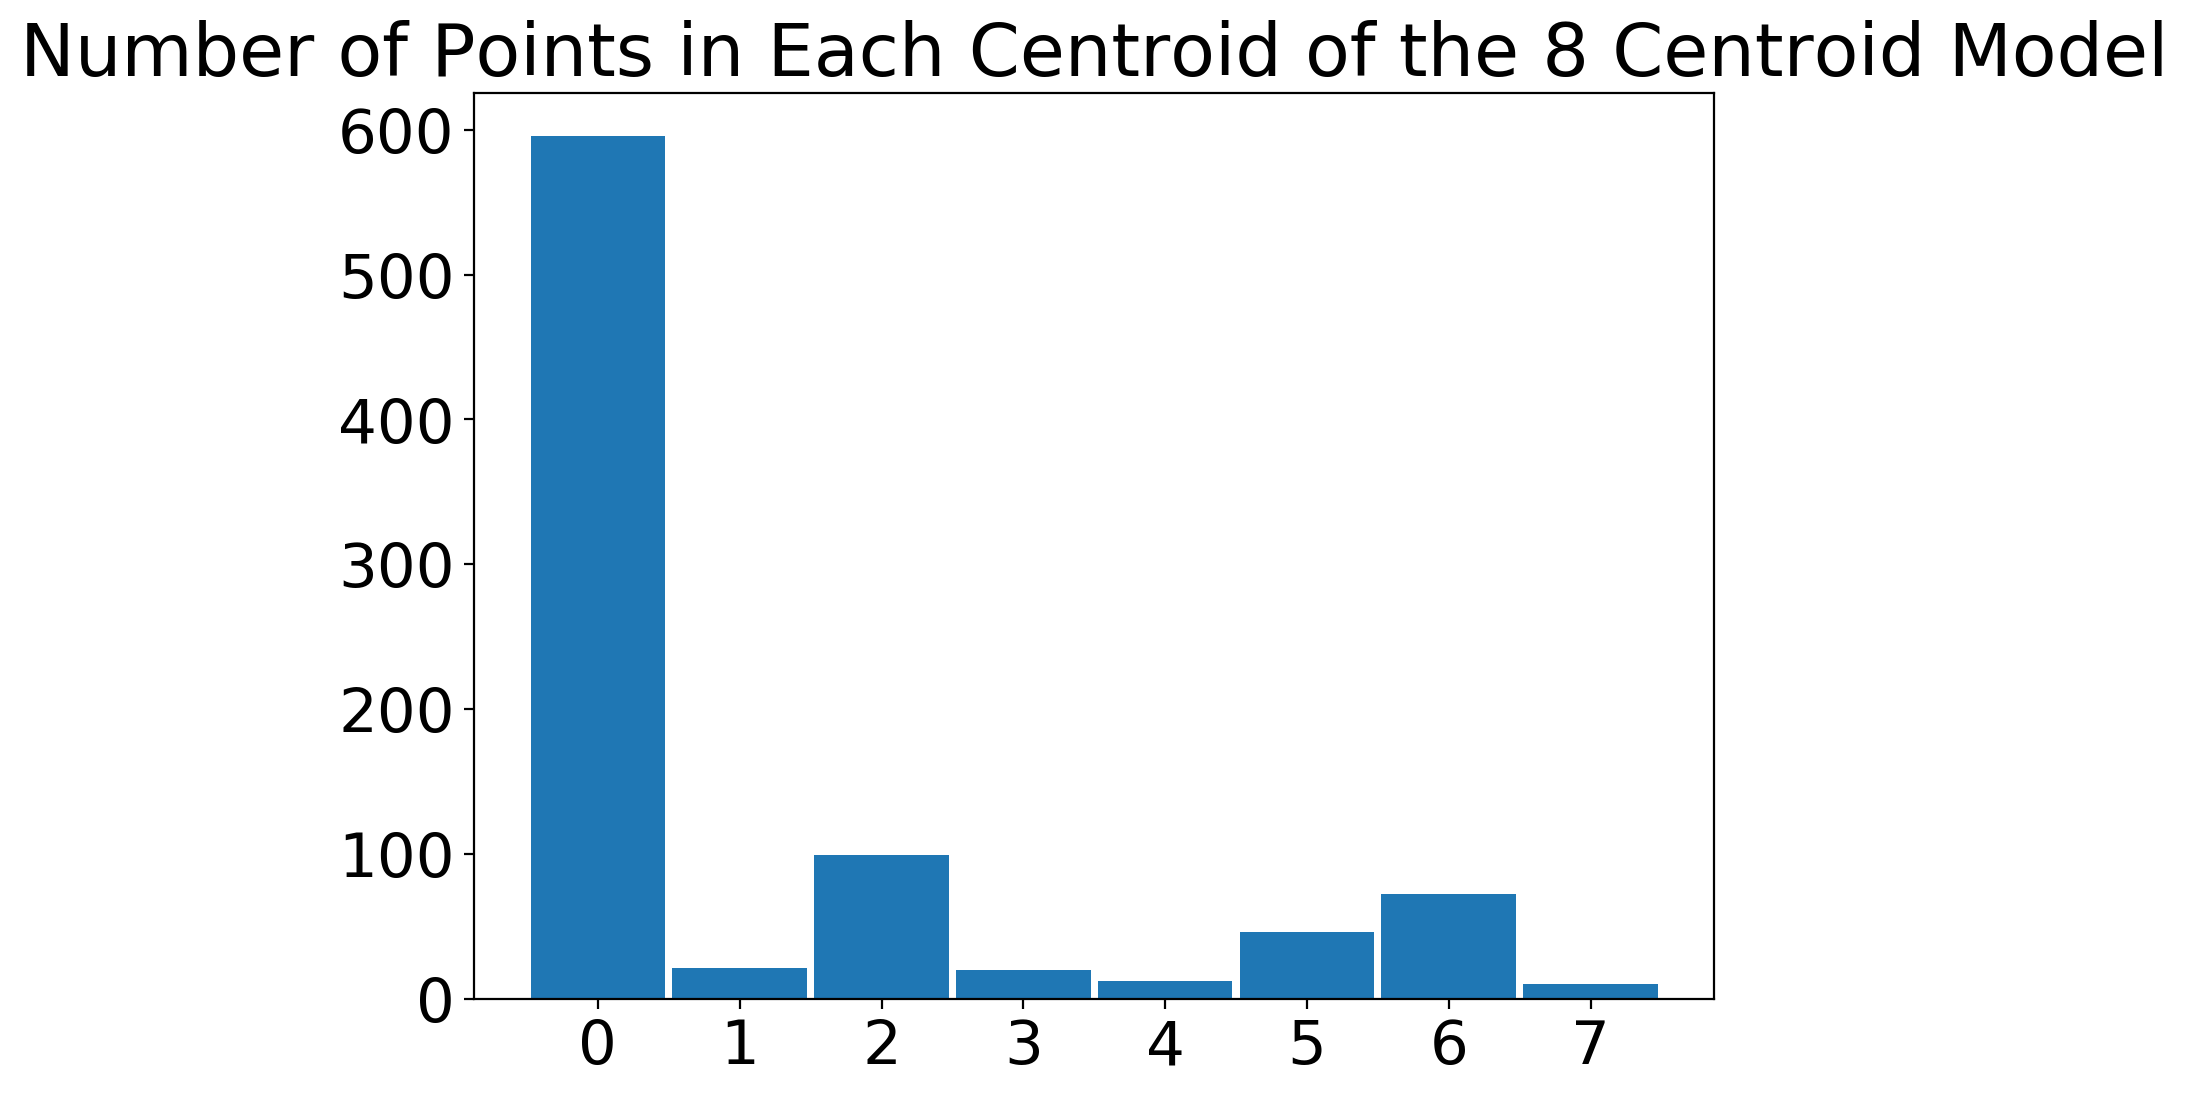

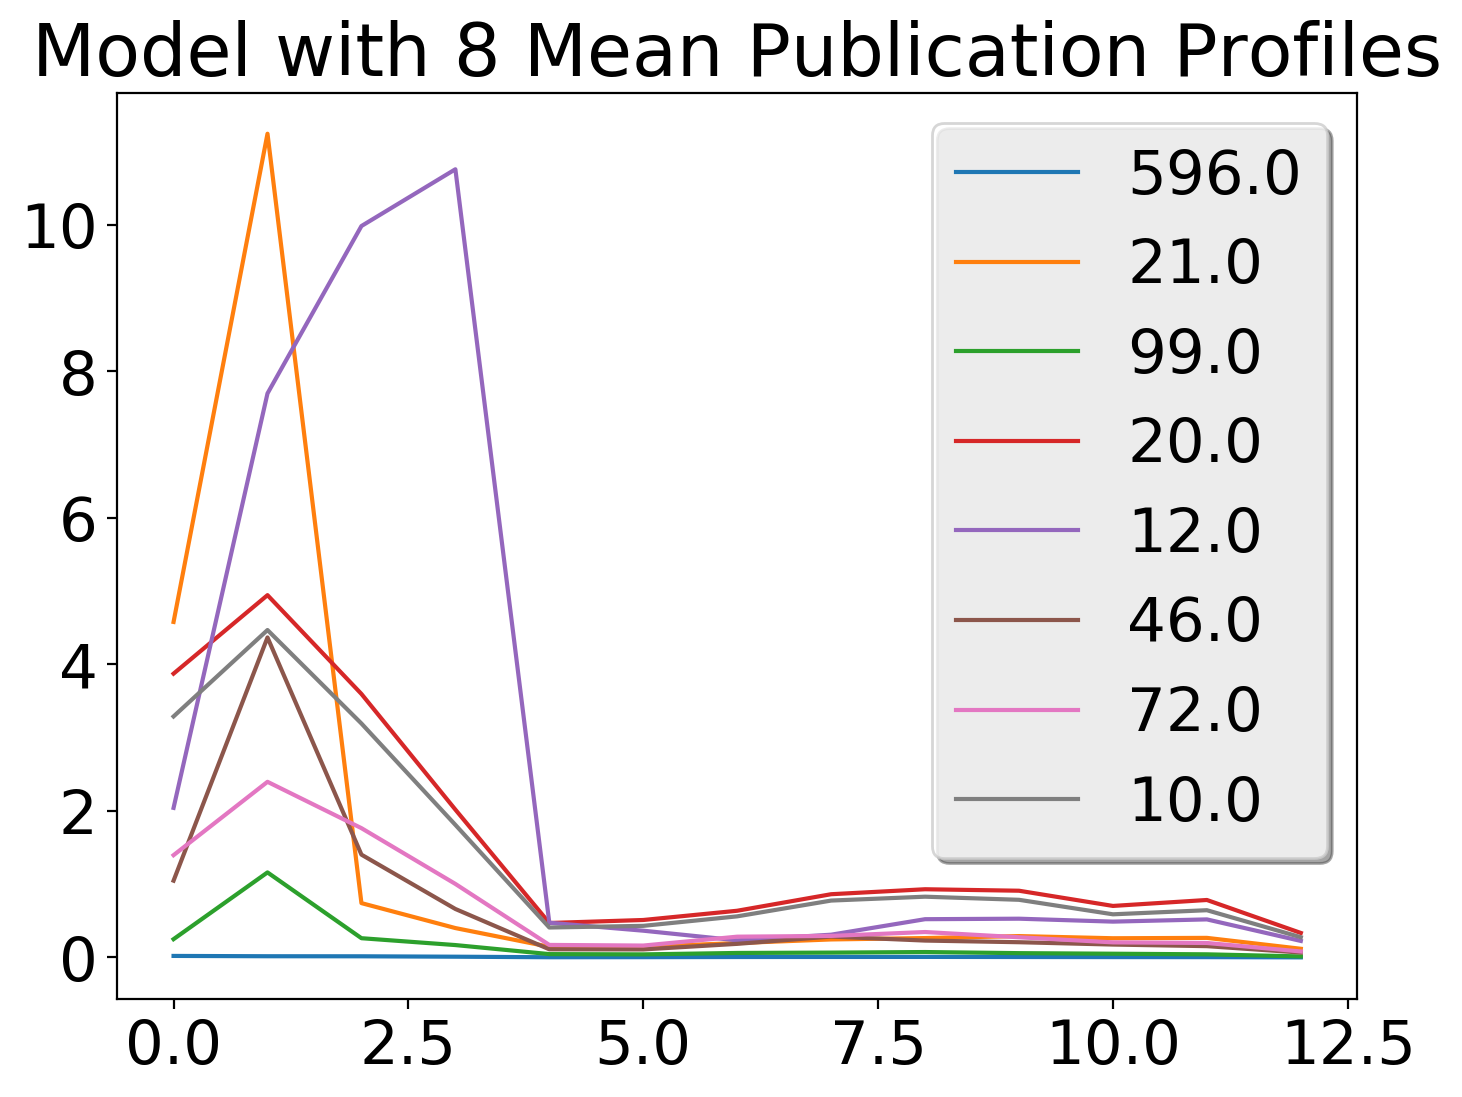

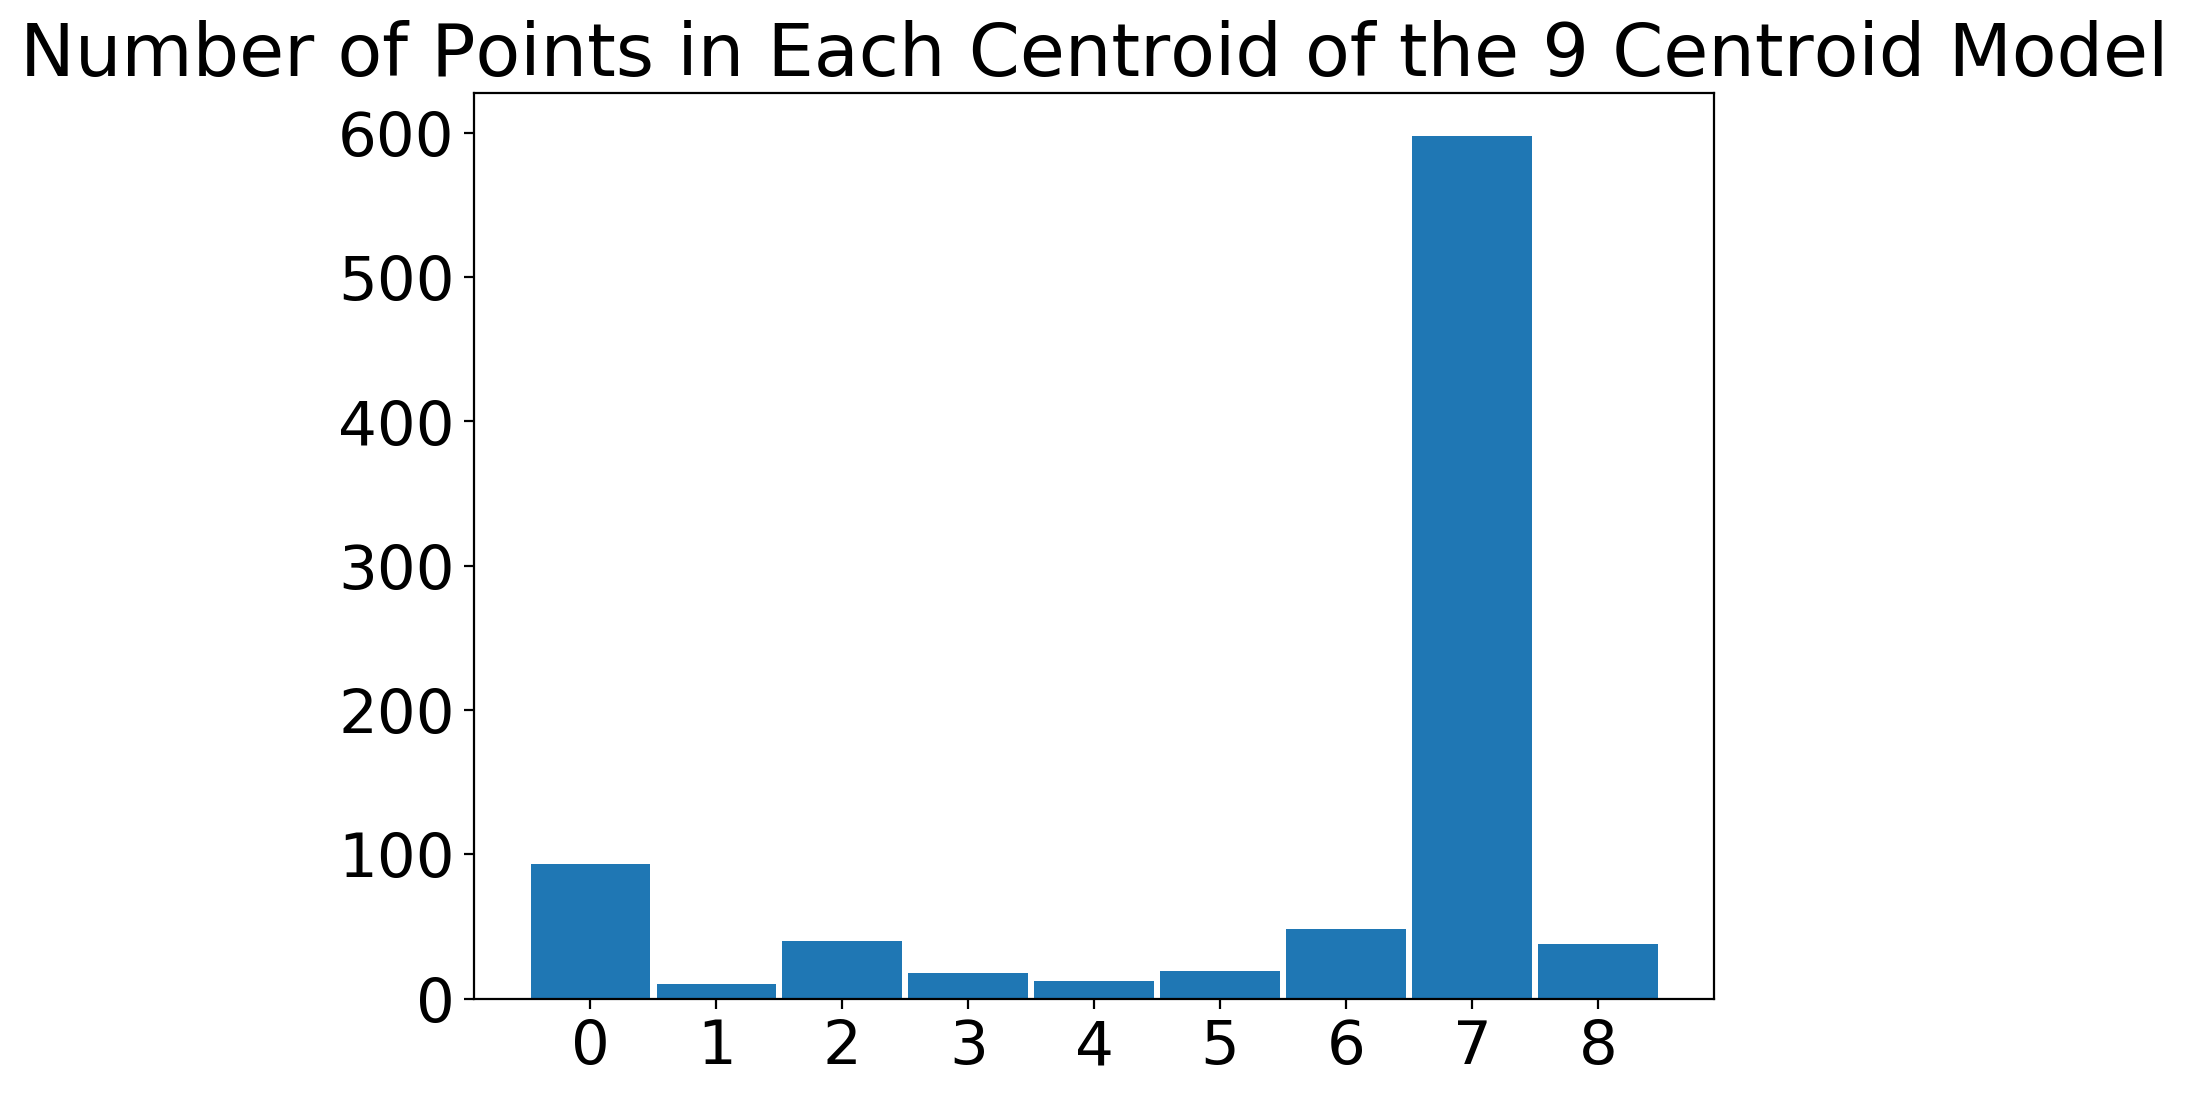

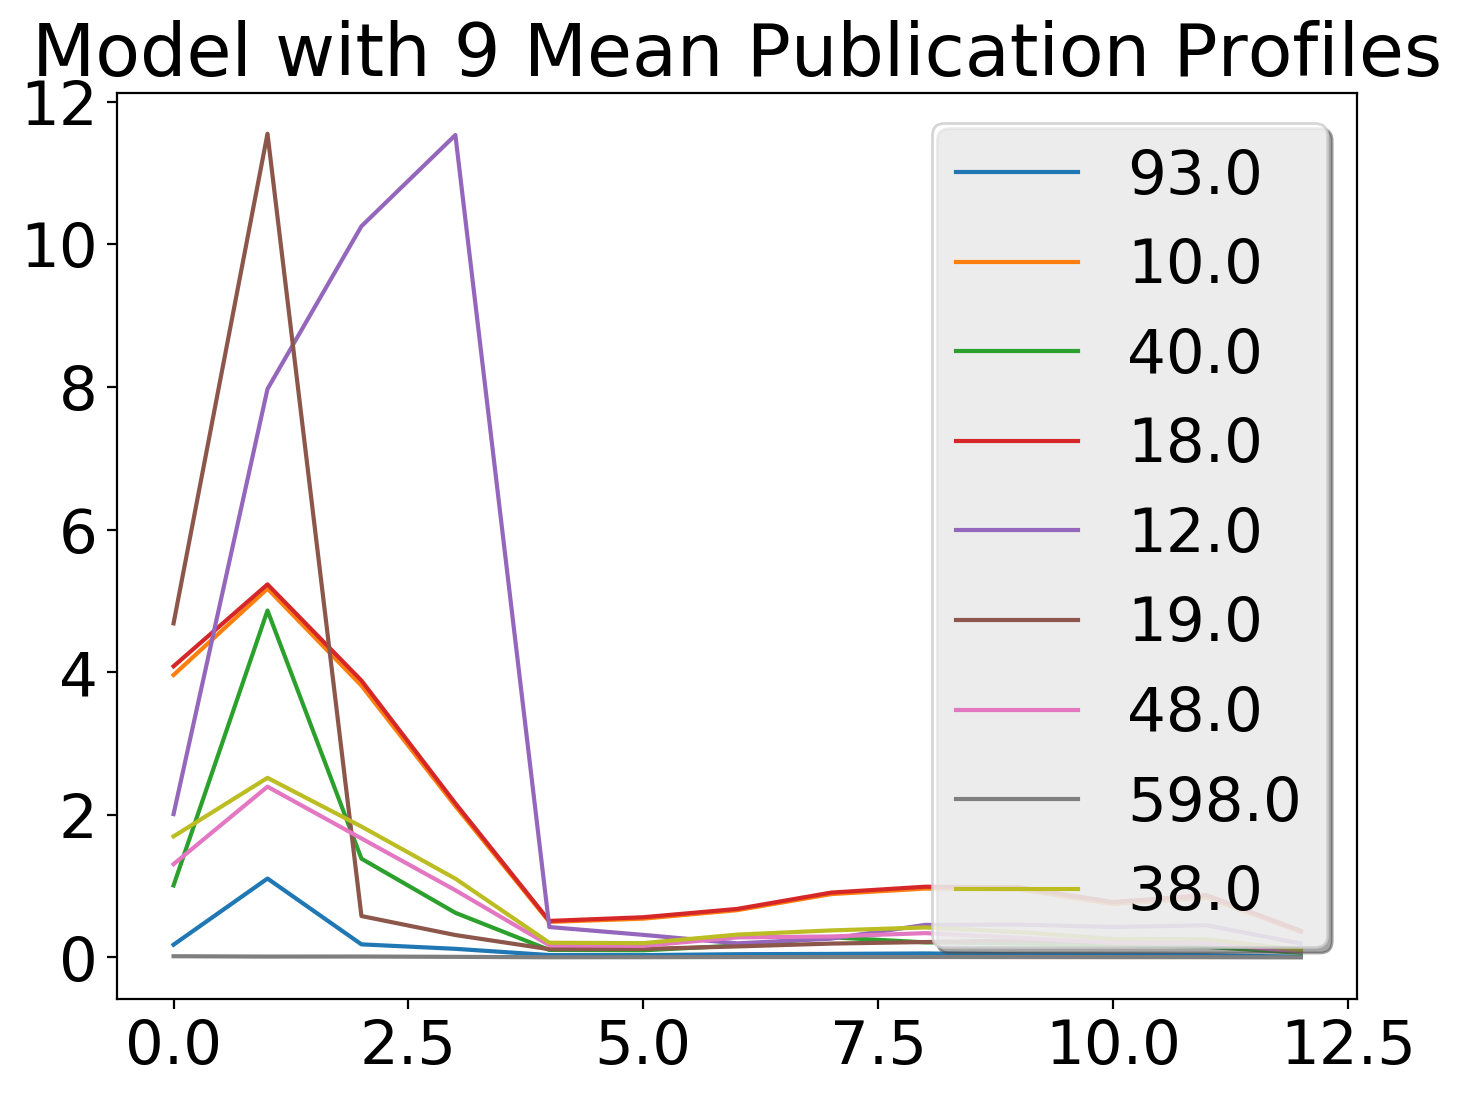

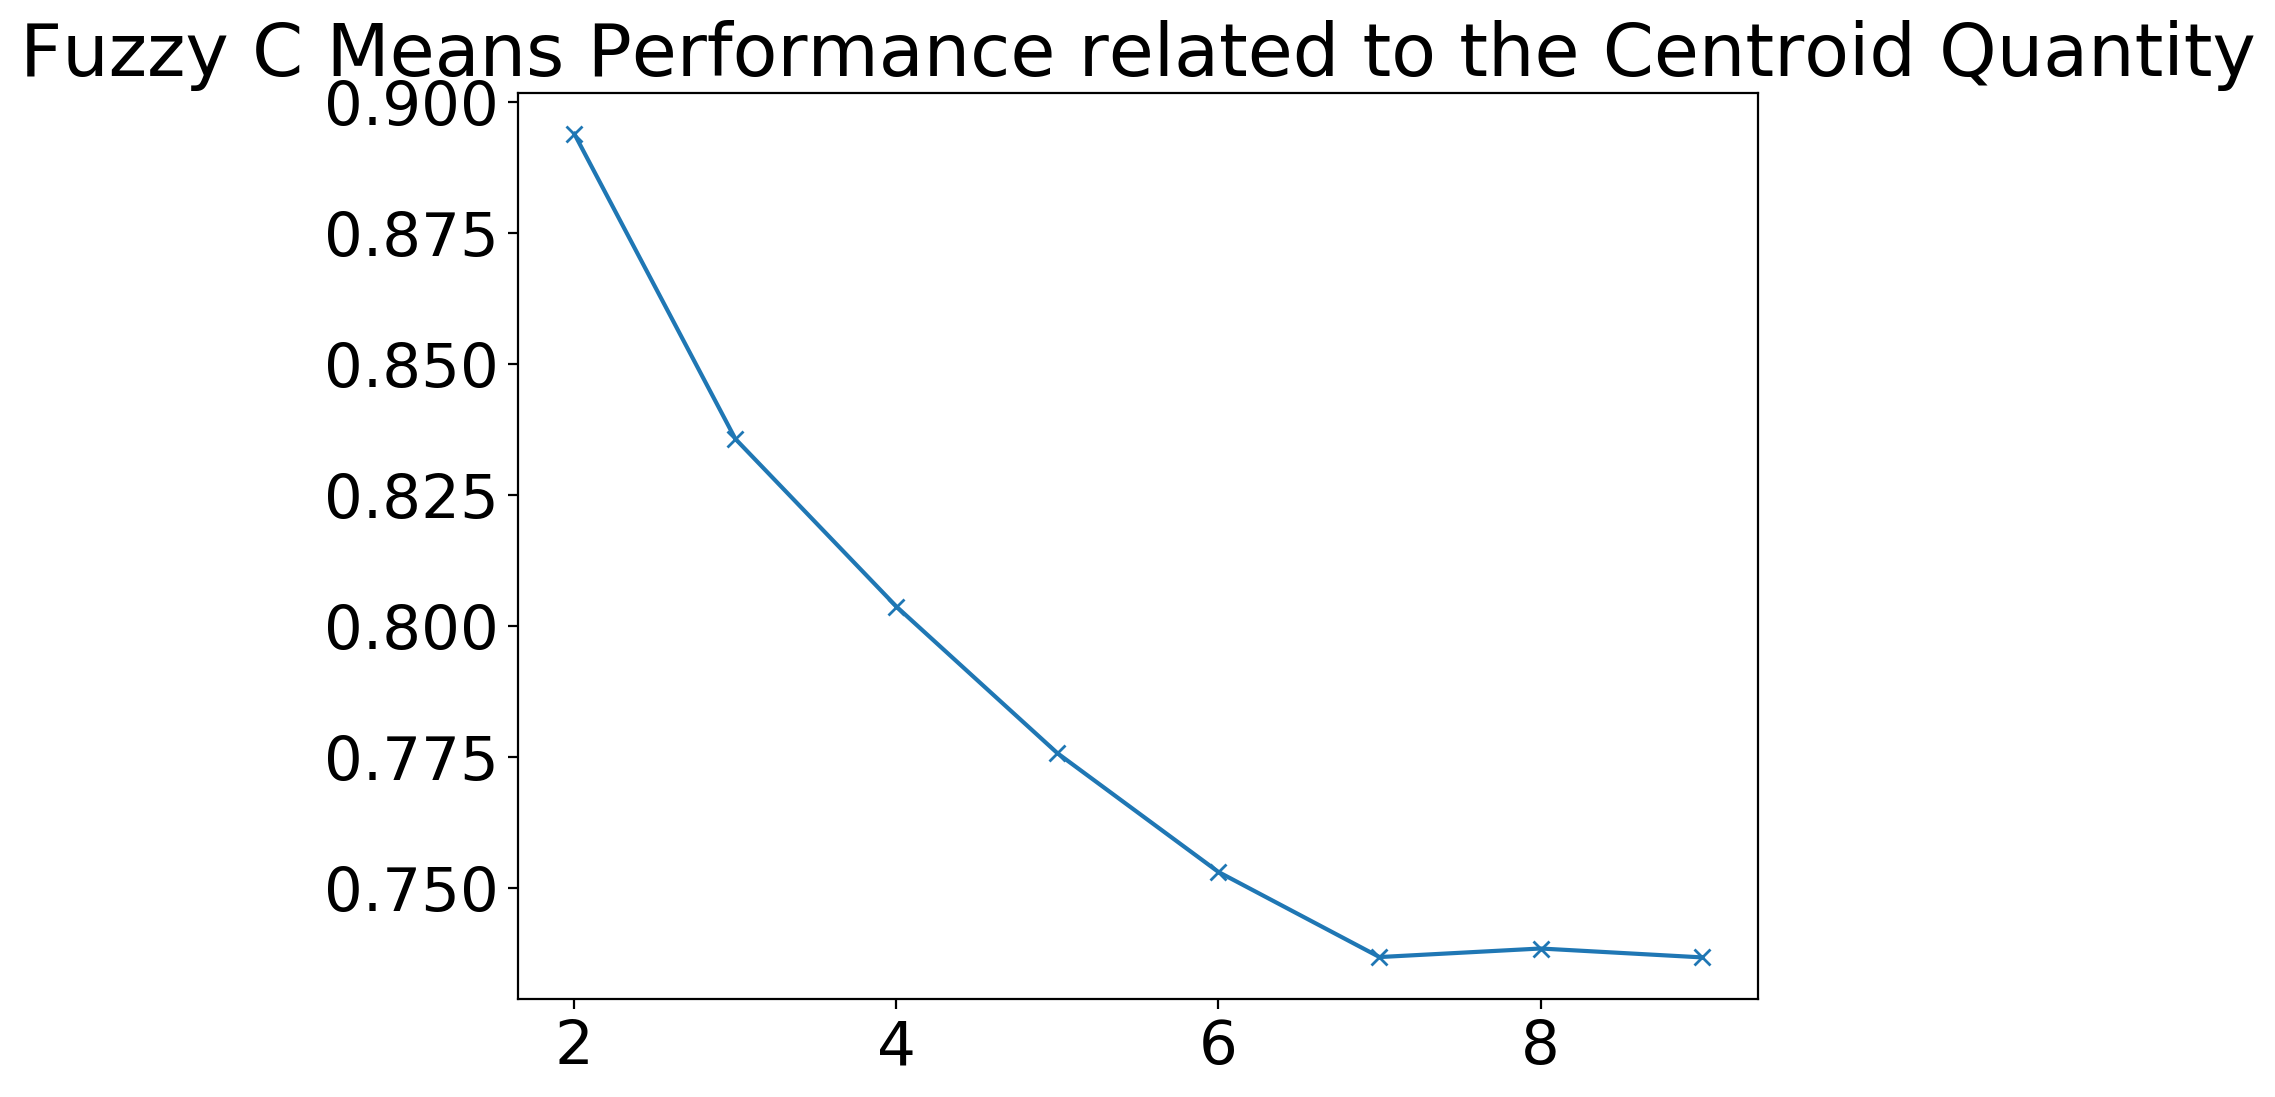

In [9]:
#codigo que funciona para o lattes small
cleandata = pubdata
fpcs = []
centers = []
clusters = []

imin = 2
imax = 10

print('Rodada com todos os dados')
for i in range(imin, imax):
    center, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(\
        cleandata.transpose(), i, 2, error=0.005, \
        maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
#plota o histograma de cada centroide
    plt.figure()
    
    clusterweight = plt.hist(cluster_membership, bins=range(i+1),
                             align='left', histtype='bar', rwidth=0.95)
    plt.xticks(range(0,i))
    plt.title('Number of Points in Each Centroid of the ' + 
              str(i)+' Centroid Model')   
    plt.show()

#agrupa funcao de desempenho
    fpcs.append(fpc)
#agrupa os centroides
    centers.append(center)
#agrupa o peso dos centroides
    clusters.append(cluster_membership)
    
    fig, ax = plt.subplots()
    plt.title('Model with ' + str(i) +
              ' Mean Publication Profiles')
    for j in range(0,i):
        ax.plot(center[j], label=str(clusterweight[0][j]))
        
    legend = ax.legend(loc='upper right', shadow=True)
    plt.show()
    
#    plt.figure()
#    plt.plot(center, label=cluster_membership)
#    plt.title(str(i)+ ' Centroides')

plt.figure()
plt.plot(range(imin,imax),fpcs,'-x')
plt.title('Fuzzy C Means Performance related to the Centroid Quantity')
plt.show()


In [ ]:

#novo dataframe que recebe apenas os estudantes qeu publicaram
print('Rodada com todos os dados de alunos que publicaram pelo menos uma vez')
cleandata2 = cleandata[cleandata.sum(axis=1)!=0]
fpcs2 = []
centers2 = []
clusters2 = []

for i in range(imin, imax):
    center, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(\
        cleandata2.transpose(), i, 2, error=0.005, \
        maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
#plota o histograma de cada centroide
    plt.figure()
    
    clusterweight = plt.hist(cluster_membership, bins=range(i+1),
                             align='left', histtype='bar', rwidth=0.95)
    plt.xticks(range(0,i))
    plt.title('Number of Points in Each Centroid of the ' + 
              str(i)+' Centroid Model')   
    plt.show()

#agrupa funcao de desempenho
    fpcs2.append(fpc)
#agrupa os centroides
    centers2.append(center)
#agrupa o peso dos centroides
    clusters2.append(cluster_membership)
    
    fig, ax = plt.subplots()
    plt.title('Model with ' + str(i) +
              ' Mean Publication Profiles')
    for j in range(0,i):
        ax.plot(center[j], label=str(clusterweight[0][j]))
        
    legend = ax.legend(loc='upper right', shadow=True)
    plt.show()
    
#    plt.figure()
#    plt.plot(center, label=cluster_membership)
#    plt.title(str(i)+ ' Centroides')

plt.figure()
plt.plot(range(imin,imax),fpcs2,'-x')
plt.title('Fuzzy C Means Performance related to the Centroid Quantity')
plt.show()


In [ ]:

#remocao do outlier 287
print('Rodada com todos os dados menos o outlier')
cleandata3 = cleandata.drop(287)

fpcs3 = []
centers3 = []
clusters3 = []

for i in range(imin, imax):
    center, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(\
        cleandata3.transpose(), i, 2, error=0.005, \
        maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
#plota o histograma de cada centroide
    plt.figure()
    
    clusterweight = plt.hist(cluster_membership, bins=range(i+1),
                             align='left', histtype='bar', rwidth=0.95)
    plt.xticks(range(0,i))
    plt.title('Number of Points in Each Centroid of the ' + 
              str(i)+' Centroid Model')      
    plt.show()

#agrupa funcao de desempenho
    fpcs3.append(fpc)
#agrupa os centroides
    centers3.append(center)
#agrupa o peso dos centroides
    clusters3.append(cluster_membership)
    
    fig, ax = plt.subplots()
    plt.title('Model with ' + str(i) +
              ' Mean Publication Profiles')
    for j in range(0,i):
        ax.plot(center[j], label=str(clusterweight[0][j]))
        
    legend = ax.legend(loc='upper right', shadow=True)
    plt.show()
    
#    plt.figure()
#    plt.plot(center, label=cluster_membership)
#    plt.title(str(i)+ ' Centroides')

plt.figure()
plt.plot(range(imin,imax),fpcs3,'-x')
plt.title('Fuzzy C Means Performance related to the Centroid Quantity')
plt.show()